# ANEOS IRON MODEL DOCUMENTATION NOTEBOOK

## ANEOS IRON<br>RELEASE VERSION: SLVTv0.2G1 <br>RELEASE DATE: 20200529

This Jupyter notebook provides documentation for a revised equation of state model for pure iron using the ANEOS code package.

<b>Citation Information</b>

I recommend the following citations with the use of this model:
<ul>
    <li>For the original ANEOS package development and documentation: Thompson & Lauson (1972) and Thompson (1990)
    <li>For the thermal model adjustment capability in ANEOS: Stewart, S., et al. (in press) The Shock Physics of Giant Impacts: Key Requirements for the Equations of State. In J. Lane, T. Germann, and M. Armstrong (Eds.), 21st Biennial APS Conference on Shock Compression of Condensed Matter (SCCM19), AIP Publishing. (arXiv:1910.04687)
    <li>For the development of the iron and iron-alloy equations of state: Stewart, S. T., The Thermodynamics of Giant Impacts:  Results using Improved Equation of State Models, J. Geophysics Research: Planets, in prep.
    <li>For the version-controlled EOS parameters and tables released via https://github.com/ststewart/aneos-iron-2020/: Stewart, S. T., Equation of State Model Iron-ANEOS-SLVTv0.2G1: Documentation and Comparisons (Release 1.0), Zenodo doi:TBD.
    <li>For the version-controlled ANEOS source code: Melosh, Thompson, Collins, Stewart, M-ANEOS v1.0, Zenodo, doi:10.5281/zenodo.3525030. (https://github.com/isale-code/M-ANEOS)
    <li>This EOS for pure iron does not make use of the molecular gas capability of Melosh (2007) or the melt curve+high-pressure phase capability of Collins & Melosh (2014), but the ANEOS code version includes these features.
</ul>

The README file in the github repository provides the history of release versions and associated doi numbers. Future updates to this iron EOS will be version-controlled via GitHub releases with Zenodo doi numbers.

This notebook also highlights several technical issues that arise in developing and implementing EOS models into hydrocodes. We introduce two tabulated quality parameters to help guide usage of this EOS model.<p>

Sarah T. Stewart<br>
sts@ucdavis.edu<br>
Version SLVTv0.2G1SLVTv0.2G1 frozen on 11/5/2019<br>
Documentation updated May 29, 2020<br>

<b>VERSION INFORMATION</b><br>
Iron EOS Version: Iron-ANEOS-SLVTv0.2G1<br>
SLVT# translates to solid-liquid-vapor-thermal model adjustment-version number<br>
G1 = the gridded EOS tables used the gridflag=1 definition for the grid points<br>
SLVTv0.2G1 Public Release Date: May 29, 2020<br>
GitHub: https://github.com/ststewart/aneos-iron-2020/<p>

This is a solid-liquid-vapor ANEOS model with ionization for pure iron. This model EOS uses the new heat capacity adjustment factor described in Stewart et al. (in press, SCCM19) and Stewart, ANEOS Code Modification: Thermal model adjustment parameter, https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/, 2019. <p>

This Jupyter notebook was used to develop and document new ANEOS input parameters for iron that are optimized for the melt curve, liquid region and vapor curve. This development project focused on improving the model EOS for impact simulations where the material is melted and partially vaporized upon shock and decompression. This EOS model does not include any solid-solid phase transitions.<p>

This notebook also reproduces some of the figures in Stewart, S. T., Thermodynamics of Giant Impacts:  Results using Improved Equation of State Models, in prep. The figures include a comparison to the Tillotson EOS, so this notebook also includes Tillotson EOS functions based on the implementations in iSALE-Dellen (https://isale-code.github.io/) and Hosono et al. (2019).<p>

Comments on the input parameters and the reference list are provided at the end of this notebook.<p>

<b>USAGE</b><br>
This notebook interacts with multiple outputs from ANEOS, including phase boundary information, the calculated Hugoniot, and tabulated EOS. The notebook also reads in material properties data and extracted data from previous versions of ANEOS model parameter sets for iron found in the subdirectories of this repository.

This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode need to compile the M-ANEOS source code v1.0 and put the executable in the local directory.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-MDQ.TXT: Ascii 301-style SESAME table with the MDQ rating. <br>

NEW-SESAME-IEP-BILINEAR.TXT: Standard length Sandia-style SESAME file with 201 table and 301-style table containing the IEP values for bilinear interpolation. Format: 1-D interpolated density points, 1-D interpolated temperature points, 2-D IEP arrays for pressure, sp. internal energy, Helmholtz free energy, sound speed). IEP units are ratios to the original calculated ANEOS point values. Located in the interpolation subdirectory.<br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>APPLICATIONS AND LIMITATIONS</b><br>
The reference state is the gamma-iron phase (fcc) at STP, although the true phase at STP is alpha-iron (bcc). The gamma-iron phase is the phase along the melt curve from about 5 to 100 GPa. The reference bulk modulus is the value for gamma-iron at STP (151 GPa, Dorogokupets et al. 2017). The Debye temperature is fitted to attain the true specific entropy at melting with a single solid phase. The heat capacity adjustment parameter ($f_{cv}$) is set to 1.33 to fit the measured  liquid heat capacity at 1 bar (Desai 1986) and entropies on the shock Hugoniot (Kraus et al. 2015).

This EOS table is appropriate for problems where iron is present as a warm solid near the melt curve, liquid, and partially vaporized. The critical point is much improved over previous version of iron ANEOS used in modeling impact processes. The Grueneisen parameter is fitted to data for liquid iron and extrapolates to a limiting value of 0.5 match the available data (a limiting value of 0.5 vs. 2/3 is debated; see Burakovsky and Preston, 2004). The functional form for the Gruneisen parameter in ANEOS has difficulty matching the experimental values for liquid iron at low densities.<p>

The model vapor curve cannot simultaneously fit the triple point, 1-bar boiling, and critical point estimtes. See discussion below. The specific entropy for the vapor side of the liquid-vapor boundary is high and may lead to an understimate of the mass fraction of vapor.

The melt curve is a little high in the region near the gamma-iron, epsilon-iron, liquid triple point. 

The solid region is an approximation of gamma-iron and neglects the presence of multiple solid phases (particularly the epsilon-iron (hcp) phase at high pressures). This model does not include solid-solid phase transitions to avoid the artificial discontinuities introduced in the liquid field by the current version of ANEOS. The multi-phase SESAME table developed by Sjostrom & Crockett (2018) is more appropriate for problems entirely in solid iron; however the Sjostrom & Crockett EOS does not include expanded states or a vapor curve. A wide-ranging multi-phase iron SESAME table, including a vapor curve, was prepared by Kerley (1993). In this EOS, the boiling point temperature is near the experimental value, but the critical point temperature (25,000 K) is higher than estimated in various ab initio calculations (see Medvedev 2014). Refer to these works for phase diagrams of the solid phases.

The interpolation procedure to make the GADGET2 density-entropy-grid table uses linear interpolation on the same density grid as the density-temperature SESAME table to obtain the EOS values at each GADGET2 entropy grid point. This method introduces substantial errors in the vapor dome. <p>

<b>MODEL DEVELOPMENT QUALITY (MDQ) RATING</b><br>
We provide an MDQ rating which is saved as a 301-style SESAME table. The MDQ rating is a qualitative guide for users that provides some known quality control information. This information is necessarily subjective and incomplete. The rating does not guarantee any fidelity in the EOS model except for points that have been directly compared to experimental data in the plots below. See discussion with the plots below.

<b>INTERPOLATION ISSUES AND THE INTERPOLATION ERROR PARAMETER (IEP)</b><br>
The IEP measures the quality of the interpolation scheme for a specific variable on a specific density-temperature grid. Robust interpolation of wide-ranging EOS tables is known to be a difficult problem. Most interpolation schemes individually interpolate each variable, which leads to interpolated states that are not thermodynamically self-consistent. While some thermodynamically consistent interpolation schemes have been developed (e.g., Zeman et al. 2019), they more computationally intensive than simpler interpolation methods and have not been widely implemented yet. Running full ANEOS in your calculation provides the most accurate EOS.

The IEP is calculated on the density-temperature grid using the following method: 
<ul>
    <li>Start with a grid that is twice as dense as the desired final grid and generate an ANEOS density-temperature table.
    <li>Split the table into two tables made from the even rows and columns and the odd rows and columns.
    <li>Interpolate for the odd index grid values using the even index table.
    <li>The IEP is given by (interpolated value-original value)/(original value) of the odd index table.
</ul>

A tabulated EOS must be sufficiently densely gridded to capture the phase boundaries. Otherwise, non-physical material response can arise during problems that cross the phase boundary. Simple interpolations schemes generally produce large errors in and near phase boundaries. See illustrative plots below. 

<b>We recommend that the interpolation scheme, the implementation of the scheme into EOS code functions (e.g., the source code), and IEP values should be reported in published works that use tabular EOS.</b> See the Jupyter Notebook in the subdirectory and the plots below.

<b>ANEOS NOTES</b><br>
The ANEOS source code used in this work is M-ANEOS v1.0, which is publicly released at https://github.com/isale-code/M-ANEOS/. M-ANEOS is a commonly used name to indicate that the code includes Melosh's (2007) treatment for molecular gas; however, not all material models use this feature, so this documentation uses ANEOS to generically refer to the EOS code package, which has had many stages of development. This version also has the capability to include a melt curve and solid-solid/liquid-liquid transition (Collins & Melosh LPSC 2014).<br>
The version of ANEOS that was updated by Melosh and Collins was modified to adjust the Debye model for the thermal term in the Helmholtz free energy to approach a user-defined heat capacity at high temperatures (Stewart et al., in press, arXiv:1910.04687). The multiplicative factor $f_{cv}$ is entered in input value V44, and the high-temperature heat capacity is $3f_{cv}Nk$. These various modifications have been consolidated into a single version for public release as M-ANEOS v1.0.<p>
The ANEOSTEST.f routine was modified to output tabulated EOS. Note that the current version of this function sets positive pressures smaller than 1.E-30 GPa equal to 1.E-30 GPa.<br>
ANEOS2.f was modified to increase the number of points tabulated on the melt curve in the ANEOS.OUTPUT file and to gather the variables for the heat capacity modification.<br>
ANHUG.f was modified to output more Hugoniot points.<br>
ANEOS1.f and ANEOS2.f were modified to increase the high temperature limit for the heat capacity.<p>

<b>FUTURE DEVELOPMENTS</b><br>
<ul>
<li>The Hugoniot extraction function needs to be improved.
<li>Add information to MDQ to identify regions with experimental validation.
<li>Add binary format output for EOS tables.
<li>Examine other table interpolation schemes, including thermodynamically self-consistent schemes such as Zeman et al. (2019).
<li>Try rational function interpolation method of Kerley (1977) on the original density-temperature-grid table. Initial comparisons are included in the interpolation-parameter subdirectory.
<li>Plots of free energy terms.
<li>Currently, SESAME ascii file sizes are limited by github. Future releases will use binary SESAME files.
</ul>

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>

In [1]:
# this cell has a java script that that enables hiding the raw python code

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Record the verions information for these calculation for posterity
import platform
print('python version: ',platform.python_version())
del platform
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
del matplotlib
import numpy
print('numpy version: ', numpy.__version__)
del numpy
import scipy
print('scipy version: ', scipy.__version__)
del scipy
import pandas
print('pandas version: ', pandas.__version__)
del pandas

# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
# import python libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
import numpy as np
from scipy import interpolate
import colormaps as local_cmaps
import subprocess
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True

python version:  3.7.7
matplotlib version:  3.1.3
numpy version:  1.18.1
scipy version:  1.4.1
pandas version:  1.0.3


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [3]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 0 # 1=development mode; 0=release mode
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=1  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MODELNAME = 'Iron-ANEOS-SLVTv0.2G1'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 191105.     # Date as a single 6-digit number YYMMDD
VERSION = 0.2      # ANEOS Parameters Version number
FMN = 26.          # Formula weight in atomic numbers for Fe
FMW = 55.847       # Formula molecular weight (g/cm3) for Fe
# The following define the default initial state for material in the 201 table
R0REF   = 8.06     # g/cm3 *** R0REF is inserted into the density array; using gamma-iron for rho0
K0REF   = 1.51E12  # dynes/cm2; using gamma-iron for rho0
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 0: low res for testing
# 1: high res for production: release version SLVT1.0G1
gridflag = 1
#
#------------------------------------------------------
if gridflag == 0: # low resolution grid for bad grid example; set tskip=1 to reproduce the plot
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 1750, 1950, 20000.,1.E5, 1.E7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [20, 20, 150.,50.,10.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.5, 6.6, 7.4, 20., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [50, 20, 20, 40, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.1] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [200] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 1750, 1950, 20000.,1.E5, 1.E7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [2, 75., 100, 500.,85.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.5, 6.6, 7.4, 20., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 84, 101, 400, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.1] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [4]:
# THIS CELL DEFINEs FUNCTIONS 
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# LOAD EXTERNAL FUNCTIONS AND OBJECT CLASSES
# defines rational function interpolation functions rf1d and rf2d
#%run rfinterpolation.py 
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE FILE STRUCTURES
%run eostable.py
#import eostable
# Run the following help for the functions in the class
#help(extEOStable())

In [5]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridtarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Remove 0 K or convert to 1 K
indexzero = get_indexes(0.,gridtarr)
indexone = get_indexes(1.,gridtarr)
if len(indexzero) == 1 and len(indexone) == 0:
    gridtarr[indexzero] = 1.
    print('Zero kelvin changed to 1 kelvin.')
else:
    gridtarr = np.delete(gridtarr, indexzero)
    print('Deleted zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
tillearr = np.power(10.,np.arange(800)/800.*6.-3.) # MJ/kg
tillearr = np.append(0.,tillearr)
print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
if (len(np.unique(tillearr))!=len(tillearr)):
    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
T0REF already in temperature array:  298.0 [254. 276. 298. 320.]
Zero kelvin changed to 1 kelvin.
Number of temperature points:  812
Inserted the REFERENCE DENSITY INTO THE ARRAY: [7.9985 8.03   8.06   8.0615 8.093 ]
Number of density points:  836
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 2038146.0
Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)= 5432306.0
Number of specific internal energy points for Tillotson EOS:  801

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [6]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.
READING IN EOS DISTRIBUTION FILES.


In [7]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT',silent=False)
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *ANEOS INPUT FILE FOR STSM JUPYTER NOTEBOOK. VARIABLES MUST BE SPACED BY 10 CHARACTERS.
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 ANEOS1    -1        'IRON-ANEOS-SLVTv0.2'         THUG=0.02568    RHUG=7.874    LONG

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    1         4         8.06      298.      1.e6      1.51E12   1.90      -450.0 

 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 * Esep adjusted to match 1-bar boiling pt with cv=1.33*3nR
 ANEOS3    0.        1.5       10.20E10  1809.     0. 

In [8]:
#--------------------------------------------------------------------------
# Identify poor regions of the EOS table: SET THE MDQ FLAG
#
MDQtmp = np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT)
# only one solid phase included
badind = np.where((np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==2)) # vapor dome
MDQtmp[badind] = -3
# only one solid phase included
badind = np.where((np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==4)) # solid region
MDQtmp[badind] = -4
# the high-pressure solid melt curve above the Hugoniot crossing point probably has too low sp. entropy
badind = np.where((np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 270.0)&(np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==5))
MDQtmp[badind] = -4
#
# return MDQ to the proper shape
NewEOS.MDQ = np.reshape(MDQtmp,(NewEOS.NT,NewEOS.ND))
#

In [9]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
            else:
                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
if DEVMODE:
    #### WRITE MDQ Flag as a 301-style table
    NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.
All S VALUES NEGATIVE AT THIS INDEX, TEMP(K):  0 1.0
Starting interpolation for GADGET table.
Minimum values used in the rational function interpolation scheme:
gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=
9.99999968e-31 1e-30 1e-10 1.0 1e-10 0.0 -1940720.52
LINEAR INTERPOLATION FOR GADGET TABLE.
Done interpolating the gadget2 table.


In [10]:
# READ IN IRON MATERIAL DATA SETS
datadir='./data/'
#======================================================================
#======================================================================
# Gather some experimental and theoretical data on iron

ironSTP_S = 0.489211596E-3 # sp. entropy MJ/K/kg JANAF STP value

# iron 1 bar entropy Desai 1986
#T (K), Cp (J/mol/K), dH0 (J/mol), S (J/mol/K)
Desai_file=datadir+'tabula-Desai-Table2.csv'
Desai_datarr = pd.read_csv(Desai_file,nrows=67)
Desai_tarr = Desai_datarr.iloc[:,0].values # temp K
Desai_sarr = Desai_datarr.iloc[:,3].values/55.847+0.489211596 # sp. entropy J/mol/K->kJ/kg/K offset by JANAF STP value

# iron 1 bar liquid density Assael et al. PCRD 2006 Table 3
# T(K), density (kg/m3)
Assael_file=datadir+'tabula-Assael-Table3.csv'
Assael_datarr = pd.read_csv(Assael_file,nrows=15)
Assael_tarr = Assael_datarr.iloc[:,0].values # temp K
Assael_rarr = Assael_datarr.iloc[:,1].values # rho kg/m3

# Iron alloy solidus Fe-16Si from Fischer et al. 2012 in Fig 1.2A from Fischer AGU 2016
Fischer_file=datadir+'Fischer-Fig1.2-AFischer-lower.csv'
Fischer_datalow = pd.read_csv(Fischer_file,skiprows=1)
Fischer_file=datadir+'Fischer-Fig1.2-AFischer-upper.csv'
Fischer_datahigh = pd.read_csv(Fischer_file,skiprows=1)

# Kraus et al. Nature Geoscience 2015
# Entropy tie point on the Hugoniot
Ztie_p=507. # GPa
Ztie_perrlow=-85. # GPa
Ztie_perrhigh=+65. # GPa
Ztie_s=2240.E-6 # MJ/K/kg
Ztie_serr=60.E-6 # MJ/K/kg

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
# m [rho0/rho], U=part vel(km/s), D = shockvel(km/s), P (GPa)
ihed_rho0=7.873
ihed_file=datadir+'iron-Russian-shockwave-database.txt'
ihed_datarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4),max_rows=571)
ihed_fullden = np.where(ihed_datarr[:,0] == 1.)[0]
#ihed_datarr.shape
#print(ihed_datarr[ihed_fullden,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
#    m        U        D        Cs          P        R/R0      R          E-E0   Rem  Ref
ihed_file=datadir+'iron-Russian-database-cs.txt'
ihed_csarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4,5,6),max_rows=9)
#ihed_datarr.shape
#print(ihed_csarr[:,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# http://www.ihed.ras.ru/rusbank/
# iron data compilation REFERENCES ARE LISTED AT THE END OF THE FILE
#    m        U0       P0       U        P     Rem  Ref
ihed_file=datadir+'iron-Russian-database-rel.txt'
ihed_relarr = np.loadtxt(ihed_file,skiprows=4,usecols=(0,1,2,3,4),max_rows=20)
#ihed_datarr.shape
#print(ihed_relarr[:,3])
#print(max(ihed_datarr[ihed_fullden,3]))

# Sjostrom & Crockett 2018 Hugoniot equation from their paper; temperature equation has a problem
scironuparr = np.arange(300)/300.*30. # km/s
scironusarr = 3.7885 + 1.25524*scironuparr + 0.518106*scironuparr*np.exp(-0.0866344*scironuparr) # km/s
scironparr = 7.874*(scironuparr)*(scironusarr) # GPa
scironrarr = 1./((1./7874.)*(1.-scironuparr/scironusarr))/1.e3 # g/cm3
#scirontarr = 1.24182E-3*scironparr+2.80723E-6*np.power(scironparr,2.)-1.31703E-9*np.power(scironparr,3.)+1.88449E-13*np.power(scironparr,4.)*11604. # K

# Kraus et al. 2015 fit Hugoniot SOM Equation 7
krausironuparr = (np.arange(200)+1)/200.*20. # km/s
krausironusarr = 3.41 + 1.84*krausironuparr - 0.036*krausironuparr*krausironuparr # km/s
krausironparr = 7854.*(krausironuparr)*(krausironusarr)/1.e3 # GPa
krausironrarr = 1./((1./7854.)*(1.-krausironuparr/krausironusarr))/1.e3 # g/cm3
krausironsarr = -1.984e4/np.sqrt(krausironparr) + 39.9*np.sqrt(krausironparr)-0.1047*krausironparr+2279.
krausironsuarr = -1.845e4/np.sqrt(krausironparr) + 45.7*np.sqrt(krausironparr)-0.1193*krausironparr+2270.
krausironslarr = -2.631e4/np.sqrt(krausironparr) + 22.33*np.sqrt(krausironparr)-0.007689*krausironparr+2804.

krausliqrho = 6.01 # g/cm3 1 bar boiling point, 3133 K Kraus et al. 2015 SOM Equation 6
krausironliqusarr = 0.79 + 0.50*krausliqrho + (1.19 + 0.0307*krausliqrho)*krausironuparr # km/s
krausironliqparr = krausliqrho*(krausironuparr)*(krausironliqusarr) # GPa
krausironliqrarr = 1./((1./krausliqrho)*(1.-krausironuparr/krausironliqusarr)) # g/cm3
ironliq_r0=krausliqrho
ironliq_t0=3133.



## Color mesh plots of the SESAME Rho-T table

These figures provide linear and log views of the topology of the state variables, plotted with respect to the independent variables density and temperature. The KPA flag is an ANEOS output with phase information (see plots below). When developing a new EOS, gross problems can be identified by viewing the entire phase space.

/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:305: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


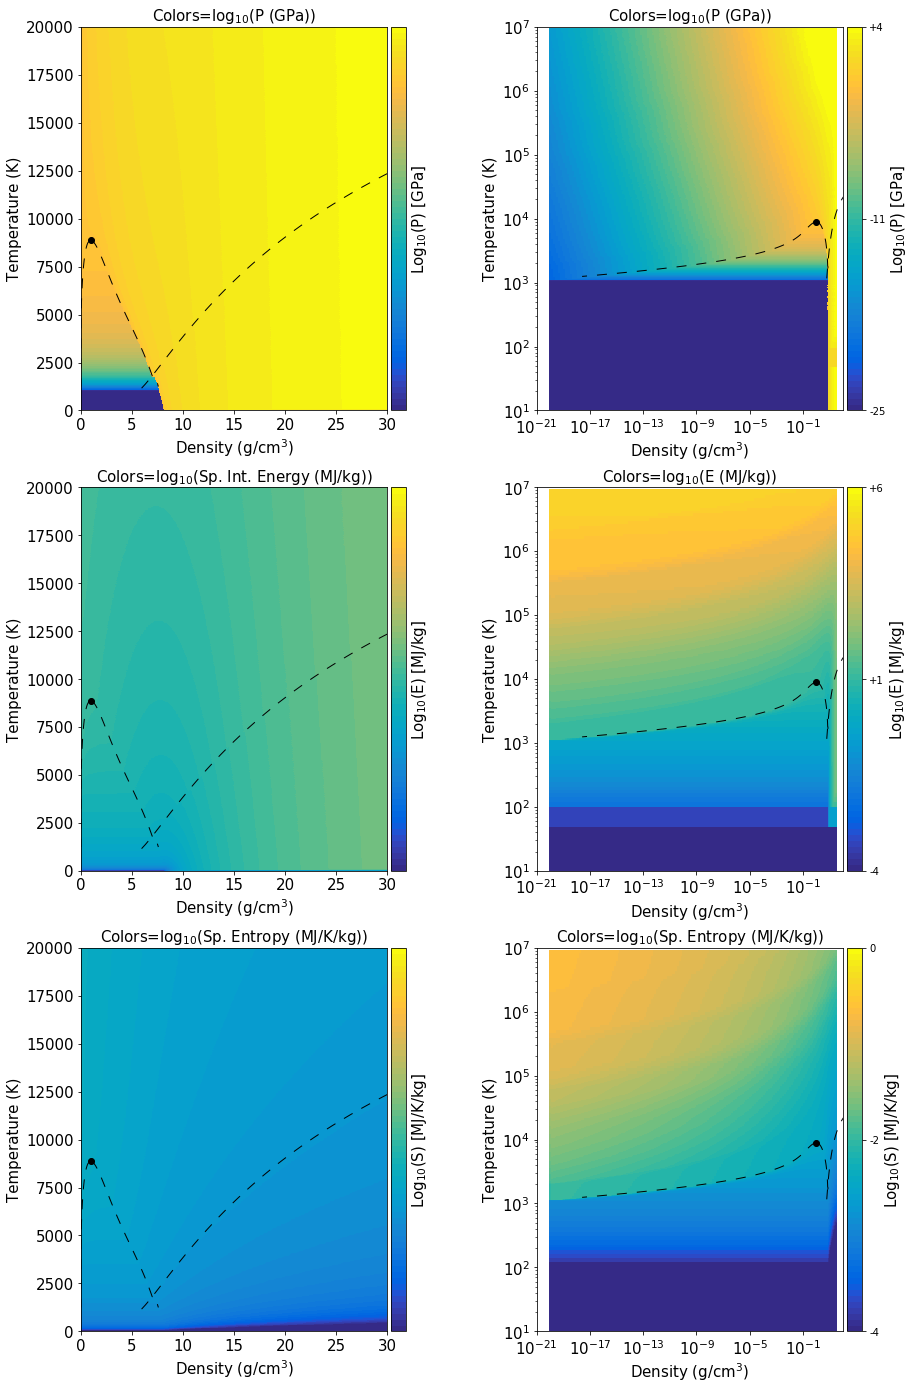

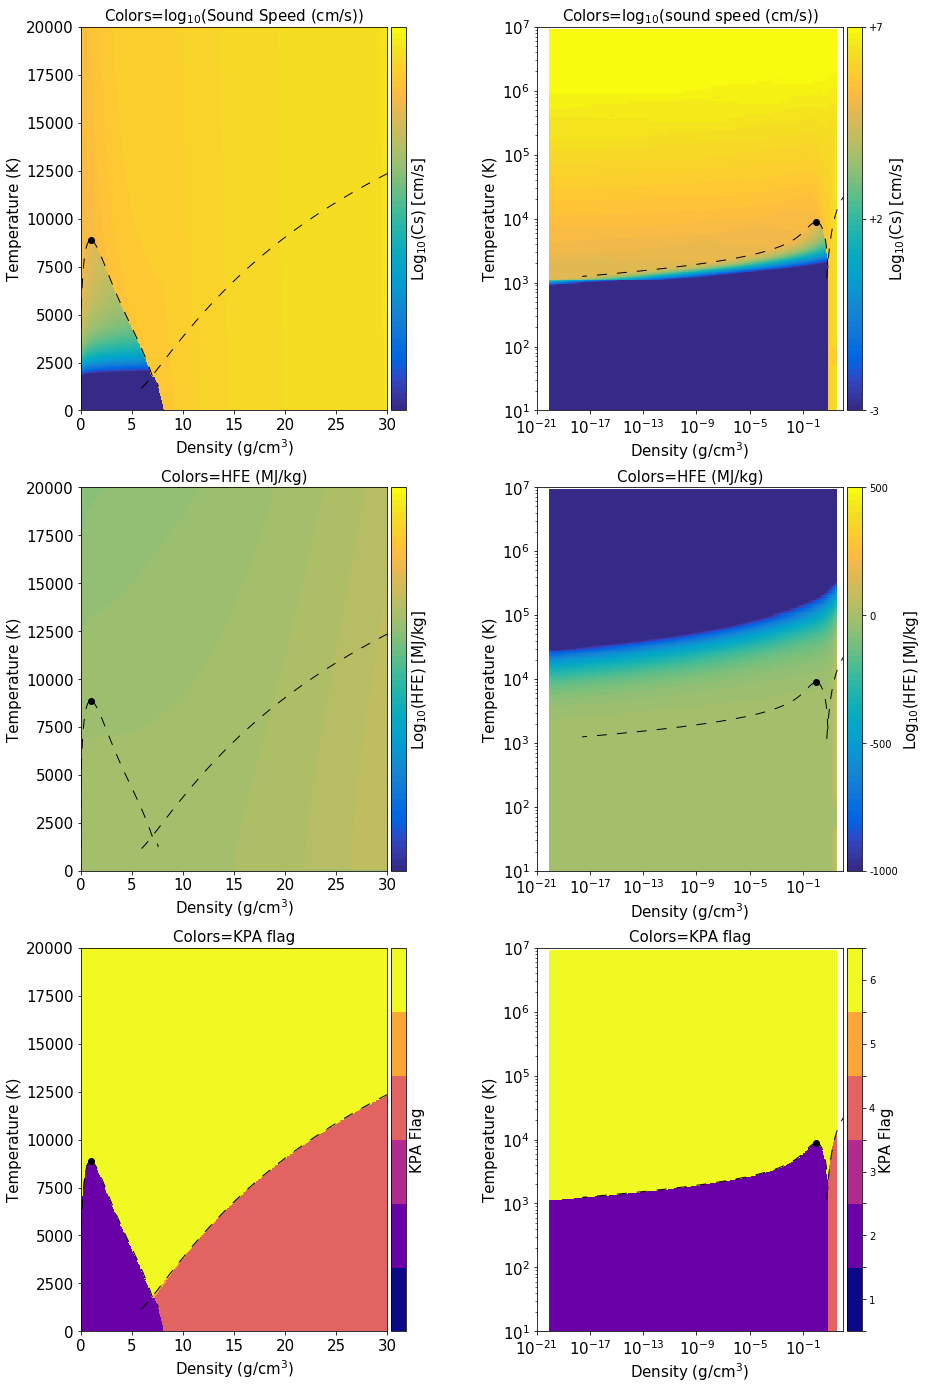

In [11]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)

%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=KPA flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=KPA flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


fig2.show()



# Model Data Quality (MDQ) Flag
We provide an MDQ rating which is saved as a 301-style SESAME table. The MDQ rating is a qualitative guide for users that provides some known quality control information. This information is necessarily subjective and incomplete. The rating does not guarantee any fidelity in the EOS model except for points that have been directly compared to experimental data in the plots below.<br>
<ul>
    <li>MDQ=1: Data point has experimental data and falls within experimental error. NOT USED AT THIS TIME. Will be added in the future.
    <li>MDQ=0: Data point rating is neutral. The value appears to be a thermodynamically self-consistent model point without known gross errors.
    <li>MDQ=-1: Data point rating is erroneous. The value is not thermodynamically correct in a known way. In this work, this flag is used for the replacement values for the tension region to generate an all positive pressure equilibrium EOS table. The current replacement scheme is to use the values in the adjacent grid cell: for each P and T in the sublimation region, use values at the adjacent density with positive pressure. The magnitude of the error is small, but the derivatives in this region will be incorrect.
    <li>MDQ=-2: Data point rating is non-physical. The value is not thermodynamically correct in a known way. In this work, this flag is used for ANEOS output with negative values for the specific entropy.
    <li>MDQ=-3: Developer judgment that this region of phase space needs to be used with caution: vapor dome. The current ANEOS model cannot fit the triple point, 1-bar boiling and critical point simultaneously. The specific entropies of the vapor side of the dome are too large at 1 bar. The use of the thermal model adjustment parameter $f_{cv}>1$ increases the specific entropy of the critical point and the vapor side of the dome compared to the Dulong-Petit limit. The value of Esep may need to be adjusted depending on the focus of the application.
    <li>MDQ=-4: Developer judgement that this region of phase space does not provide a robust representation of the material. The several solid phases of iron are not included. The high-pressure melt curve will be incorrect. Seek alternative models for problems focused in this region.
</ul>   


Unique values in the MDQ flag array: [-4. -3. -2. -1.  0.]
Value: # elements with this value
-4.0 :  155393
-3.0 :  47184
-2.0 :  1556
-1.0 :  11349
0.0 :  463350


/Users/sstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


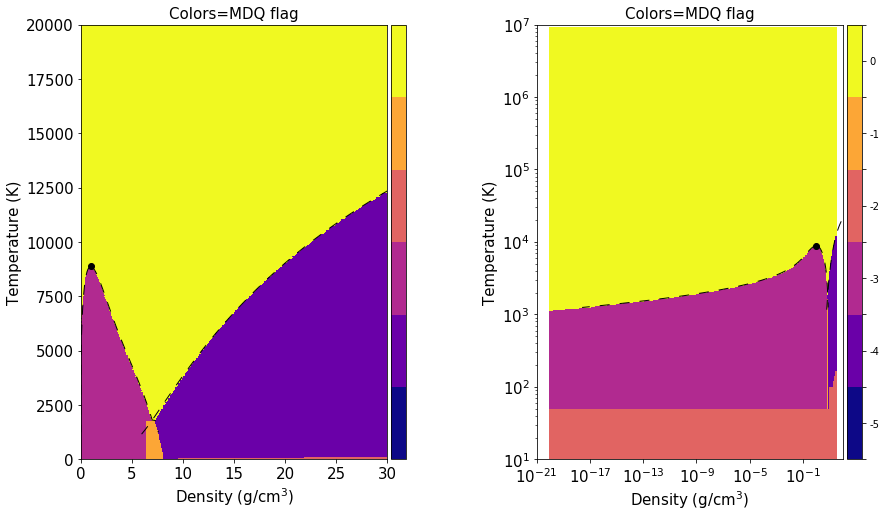

In [12]:
# check the user-defined model data quality flag across the EOS surface
uniqmdqarr = np.unique(NewEOS.MDQ)
print("Unique values in the MDQ flag array:", uniqmdqarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqmdqarr:
    ix = get_indexes(i,np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


##============= start new plot
fig3, ([ax4, ax5])= plt.subplots(nrows=1,ncols=2,figsize=(14,8))
plt.subplots_adjust(wspace=0.4)

#================ MDQ flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=MDQ flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar

cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors
ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=cmap2,vmin=0,vmax=1)
#ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.MDQ)+5)/6.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=MDQ flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar.ax.set_yticklabels(['','-5','','-4','','-3','','-2','','-1','','0','','1'])  # vertical colorbar

fig3.show()

## ANEOS Hugoniots Compared to Experimental Data

The following plots compare the ANEOS model Hugoniots with laboratory data downloaded from the shock wave database at http://ihed.ras.ru/rusbank/

The entropy on the STP Hugoniot was derived by Kraus et al. 2015.

This EOS model is constructed with a reference STP density of 8.06 g/cm$^3$. The blue curve is the model STP Hugoniot. A comparison to a Hugoniot calculated using the true STP density is shown below for comparison (red curve).

ANEOS 7.874 Hugoniot: red -- calculated in the ANEOS code using true density of 7.874 g/cm$^3$ and 298 K as the initial state (P=-3 GPa because density is in the tension region).

ANEOS 8.06 Hugoniot: blue -- calculated by linear interpolation of the EOS table starting at model reference density of 8.06 g/cm$^3$ at 298 K and P=1 bar.

The liquid Hugoniot is calculated in Kraus et al. 2015 starting at the boiling point of liquid iron at 1 bar: 6.01 g/cm$^3$, 3133 K. The ANEOS model Hugoniot with the same initial density and temperature is a good match.


Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): -3.3308
Initial Temperature (K): 298.03
Initial Sp. Entropy (MJ/K/kg): 0.0005769099999999999
Initial Sp. Internal Energy (MJ/kg): 0.10655
Initial Density (g/cm3): 7.874

Calculated Hugoniot using (T0REF,R0REF) initial state (blue curves in plots below):
Initial Pressure (GPa): 0.000328917262
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.00055392603
Initial Sp. Internal Energy (MJ/kg): 0.0947028643
Initial Density (g/cm3): 8.06


/Users/sstewart/Dropbox/eos/github/aneos-iron-release/aneos-iron-2020/eostable.py:493: RuntimeWarning: invalid value encountered in sqrt
  upnew = np.sqrt((pnew-p0)*(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbox/eos/github/aneos-iron-release/aneos-iron-2020/eostable.py:494: RuntimeWarning: invalid value encountered in sqrt
  usnew = (1./r00)*np.sqrt((pnew-p0)/(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbox/eos/github/aneos-iron-release/aneos-iron-2020/eostable.py:493: RuntimeWarning: invalid value encountered in sqrt
  upnew = np.sqrt((pnew-p0)*(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbox/eos/github/aneos-iron-release/aneos-iron-2020/eostable.py:494: RuntimeWarning: invalid value encountered in sqrt
  usnew = (1./r00)*np.sqrt((pnew-p0)/(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbox/eos/github/aneos-iron-release/aneos-iron-2020/eostable.py:493: RuntimeWarning: invalid value encountered in sqrt
  upnew = np.sqrt((pnew-p0)*(1./r00-1./self.rho[iir]))
/Users/sstewart/Dropbo

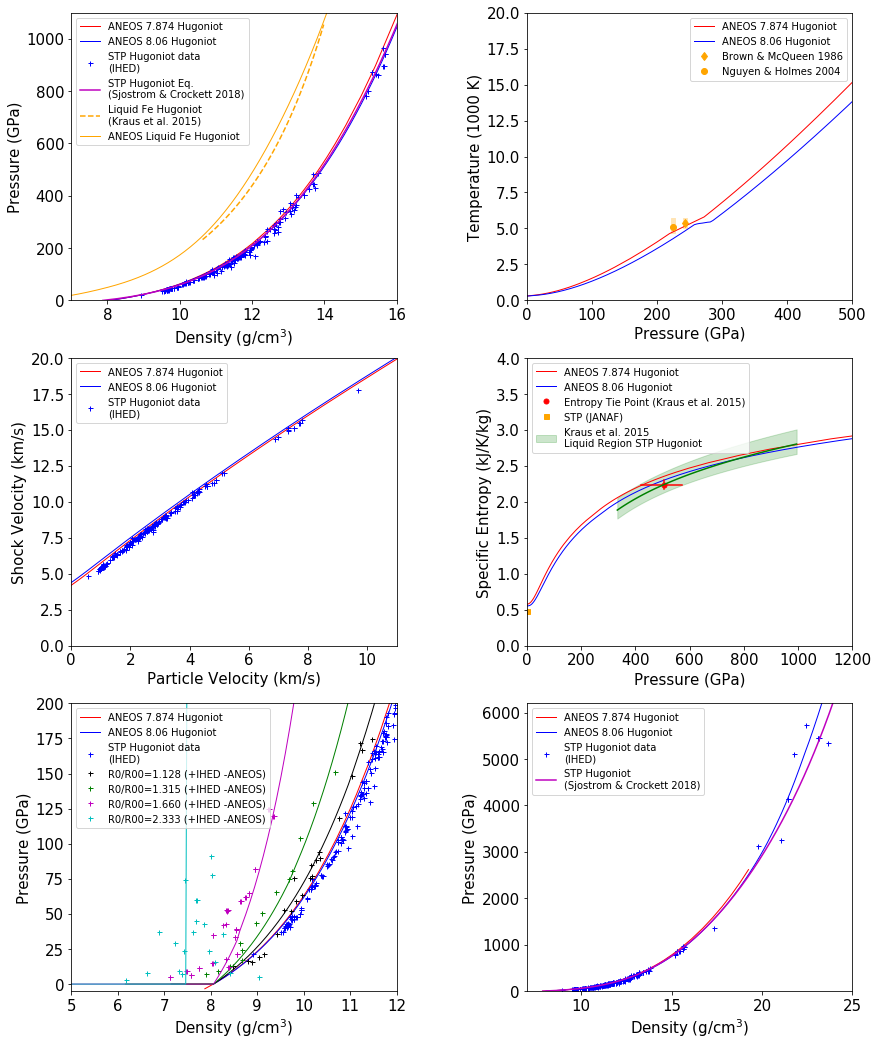

In [13]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#
print('\nCalculated Hugoniot using (T0REF,R0REF) initial state (blue curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.hug.P[0])
print('Initial Temperature (K):',NewEOS.hug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.hug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.hug.U[0])
print('Initial Density (g/cm3):',NewEOS.hug.rho[0])

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,' ']
stylezdat = ['+','black',5,'Porous Fe Hugoniot\n(IHED)']
stylegg = ['+','blue',5,'STP Hugoniot data\n(IHED)']
styleliq = ['--','orange',7,'Liquid Fe Hugoniot\n(Kraus et al. 2015)']
styleliqhug = ['-','orange',1,'ANEOS Liquid Fe Hugoniot']
stylezfit = ['-','green',1,' ']
styleanhug = ['-','red',1,'ANEOS 7.874 Hugoniot']
stylestphug = ['-','blue',1,'ANEOS 8.06 Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0

axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot Eq.\n(Sjostrom & Crockett 2018)')

# Kraus Liquid Iron Hugoniot at 1 bar boiling point
axes[ai,aj].plot(krausironliqrarr[40:100], krausironliqparr[40:100],styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
                 #linestyle='-',color='cyan',label='Kraus et al. 2015\n1-bar Boiling Pt. Liquid Hugoniot')

# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=ironliq_r0,t0=ironliq_t0)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)




axes[ai,aj].set_ylim(0,1100)
axes[ai,aj].set_xlim(7.,16.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.T/1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

## add squares
rect = Rectangle((240.,5.),6.,.700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
axes[ai,aj].add_patch(rect)
axes[ai,aj].plot(243.,5.350,'d',color='orange',label='Brown & McQueen 1986')
rect = Rectangle((222.,4.7),6.,1.000,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
axes[ai,aj].add_patch(rect)
axes[ai,aj].plot(225.,5.100,'o',color='orange',label='Nguyen & Holmes 2004')


axes[ai,aj].set_xlim(0,500)
axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

axes[ai,aj].plot(NewEOS.anhug.up,NewEOS.anhug.us,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,1],ihed_datarr[ihed_fullden,2],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])

axes[ai,aj].set_xlim(0,11)
axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.S*1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
# Tie point from Kraus et al. 2015
axes[ai,aj].plot(Ztie_p,Ztie_s*1.E3,'o',markersize=5,color='red',label='Entropy Tie Point (Kraus et al. 2015)')
axes[ai,aj].plot([Ztie_p+Ztie_perrlow,Ztie_p+Ztie_perrhigh],[Ztie_s*1.E3,Ztie_s*1.E3],'-',color='red')
axes[ai,aj].plot([Ztie_p,Ztie_p],[(Ztie_s-Ztie_serr)*1.E3,(Ztie_s+Ztie_serr)*1.E3],'-',color='red')
# Iron at STP from JANAF
axes[ai,aj].plot(1.E-4,ironSTP_S*1.E3,'s',markersize=5,color='orange',label='STP (JANAF)')

colstr='green'
axes[ai,aj].plot(krausironparr[40:80], krausironsarr[40:80]/1.e3, linestyle='-',color=colstr)
axes[ai,aj].fill_between(krausironparr[40:80],krausironslarr[40:80]/1.e3,krausironsuarr[40:80]/1.e3,color='green',alpha=0.2,label='Kraus et al. 2015\nLiquid Region STP Hugoniot')



axes[ai,aj].set_ylim(0,4.)
axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
# ANEOS REFERENCE POINT (STP) Hugoniots
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])


# POROUS HUGONIOT m=R0/R00=1.128
m=1.128
colstr='black'
labstr='R0/R00=1.128 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

# POROUS HUGONIOT m=R0/R00=1.315
m=1.315
colstr='green'
labstr='R0/R00=1.315 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)

# POROUS HUGONIOT m=R0/R00=1.660
m=1.660
colstr='m'
labstr='R0/R00=1.660 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)

# POROUS HUGONIOT m=R0/R00=2.333
m=2.333
colstr='c'
labstr='R0/R00=2.333 (+IHED -ANEOS)'
ihed_porous = np.where(ihed_datarr[:,0] == m)[0]
axes[ai,aj].plot(ihed_datarr[ihed_porous,4]*ihed_rho0,ihed_datarr[ihed_porous,3],'+',markersize=5,color=colstr,label=labstr)
NewEOS.calcporoushugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,r00=NewEOS.R0REF/m)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=colstr)


# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(5,12.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot\n(Sjostrom & Crockett 2018)')

axes[ai,aj].set_ylim(0,6200)
axes[ai,aj].set_xlim(7.,25.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)




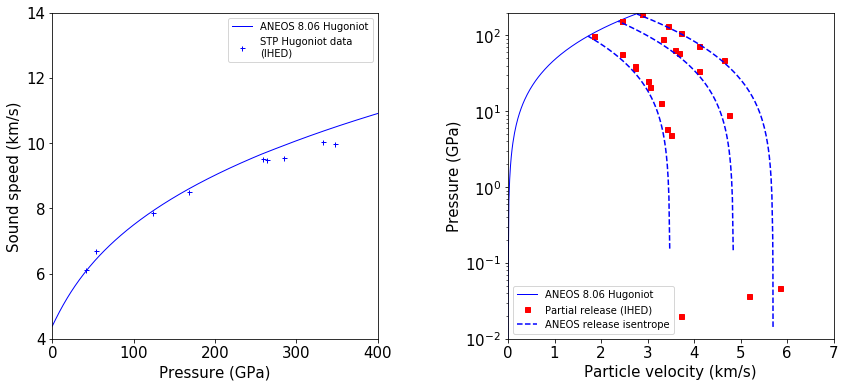

In [14]:
#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Sound Speed Hugoniot Data vs. ANEOS
ai=0
aj=0
axes[ai].plot(NewEOS.hug.P,NewEOS.hug.cs,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai].plot(ihed_csarr[:,4],ihed_csarr[:,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])

axes[ai].set_xlim(0,400)
axes[ai].set_ylim(4.,14.)
axes[ai].set_ylabel('Sound speed (km/s)',size=sfont)
axes[ai].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai].tick_params(labelsize=sfont)
axes[ai].legend(fontsize=sfont-5)

#-------------
# Particle velocity - Pressure  Data vs. ANEOS
ai=1
aj=1

axes[ai].semilogy(NewEOS.hug.up,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai].plot(ihed_relarr[:,3],ihed_relarr[:,4],'s',markersize=stylegg[2],color='red',label='Partial release (IHED)')
axes[ai].plot(ihed_relarr[:,1],ihed_relarr[:,2],'s',markersize=stylegg[2],color='red')

uniqrelarr = np.unique(ihed_relarr[:,2])
for j in range(0,len(uniqrelarr)):
    ptarget=uniqrelarr[j]
    # ANEOS ISENTROPE NEAR SAME PRESSURE
    ANEOSIsen = isentrope_class() # code in eostable.py
    Sisen = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.S) # MJ/K/kg
    # loop across all densities and extract the values for the requested isentrope
    for i in range(0,NewEOS.ND):
        ind = np.where((NewEOS.S[:,i] > 0))[0]
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
        ANEOSIsen.pressure = np.append(ANEOSIsen.pressure,interpfunction(Sisen)) # GPa
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
        ANEOSIsen.temperature = np.append(ANEOSIsen.temperature,interpfunction(Sisen)) # GPa
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.cs[ind,i]) # MJ/K/kg, cm/s
        ANEOSIsen.soundspeed = np.append(ANEOSIsen.soundspeed,interpfunction(Sisen)) # cm/s
        interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.U[ind,i]) # MJ/K/kg, MJ/kg
        ANEOSIsen.energy = np.append(ANEOSIsen.energy,interpfunction(Sisen)) # MJ/kg
    ANEOSIsen.density = np.copy(NewEOS.rho)*1000. # kg/m3
    ANEOSIsen.partvel = np.zeros(NewEOS.ND) # m/s
    ir0 = int(np.round(np.where(ANEOSIsen.pressure >= ptarget)[0][0])) # go up just past the intersection with Hugoniot
    ANEOSIsen.partvel[ir0] = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.up)*1.E3 # m/s
    #print('ANEOS Starting Pressure:',ptarget)
    iir=ir0-1
    while (ANEOSIsen.pressure[iir]>.0001):
        if iir == ir0-1:
            dp = (ptarget - ANEOSIsen.pressure[iir])*1.E9 # Pa
        else:
            dp = (ANEOSIsen.pressure[iir+1]-ANEOSIsen.pressure[iir])*1.E9 # Pa
        ANEOSIsen.partvel[iir] = ANEOSIsen.partvel[iir+1] + dp/(ANEOSIsen.density[iir]*ANEOSIsen.soundspeed[iir+1]/1.E2) # m/s
        #print(iir,ANEOSIsen.pressure[iir],ANEOSIsen.partvel[iir]/1.e3,dp/1.e9,ANEOSIsen.density[iir])
        iir=iir-1
    # plot aneos isentrope
    tmp = np.where((ANEOSIsen.pressure < ptarget)&(ANEOSIsen.pressure > .01))[0]
    if j == 0:
        axes[ai].plot(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],'--',color='blue',label='ANEOS release isentrope')
    else:
        axes[ai].plot(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],'--',color='blue')

axes[ai].set_xlim(0,7)
axes[ai].set_ylim(.01,200)
axes[ai].set_xlabel('Particle velocity (km/s)',size=sfont)
axes[ai].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai].tick_params(labelsize=sfont)
axes[ai].legend(fontsize=sfont-5)



## Model Critical Point and Shock-Induced Phase Changes



In [15]:
print('ANEOS Calculated Critical point:')
print('   Temperature (K):       ',NewEOS.cp.T)
print('   Pressure (GPa):        ', NewEOS.cp.P)
print('   Density (g/cm^3):      ',NewEOS.cp.rho)
print('   Sp. Energy (MJ/kg):    ', NewEOS.cp.U)
print('   Sp. Entropy (kJ/K/kg): ', NewEOS.cp.S*1.e3)
print('\n')
print('ANEOS Calculated Values at 1 bar:')
print('   Temperature at melting (K):                     ', NewEOS.onebar.Tmelt)
print('   Liquid density at melting (g/cm^3):             ', NewEOS.onebar.rhocm)
print('   Sp. Entropy at inc. melting Sim (kJ/K/kg):      ', NewEOS.onebar.Sim*1.E3)
print('   Sp. Entropy at com. melting Scm (kJ/K/kg):      ', NewEOS.onebar.Scm*1.E3)
print('   Temperature at boiling (K):                     ', NewEOS.onebar.Tvap)
print('   Liquid density at boiling (g/cm^3):             ', NewEOS.onebar.rhoiv)
print('   Sp. Entropy at inc. vaporization Siv (kJ/K/kg): ', NewEOS.onebar.Siv*1.E3)
print('   Sp. Entropy at com. vaporization Scv (kJ/K/kg): ', NewEOS.onebar.Scv*1.E3)
print('\n')
if NewEOS.tp.T > 0:
    print('ANEOS Calculated Triple Point:')
    print('   Temperature (K):                        ',NewEOS.tp.T)
    print('   Pressure (GPa):                         ', NewEOS.tp.P)
    print('   Solid density (g/cm^3):                 ',NewEOS.tp.rhos)
    print('   Liquid density (g/cm^3):                ',NewEOS.tp.rhol)
    print('   Vapor density (g/cm^3):                 ',NewEOS.tp.rhov)
    print('   Sp. Entropy at inc. melt Sim (kJ/K/kg): ', NewEOS.tp.Sim*1.E3)
    print('   Sp. Entropy at com. melt Scm (kJ/K/kg): ', NewEOS.tp.Scm*1.E3)
    print('   Sp. Entropy at inc. vap. Siv (kJ/K/kg): ', NewEOS.tp.Siv*1.E3)
    print('   Sp. Entropy at com. vap. Scv (kJ/K/kg): ', NewEOS.tp.Scv*1.E3)
else:
    print('ANEOS: No melt curve or triple point in this calculation.')
print('\n')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))
print('ANEOS model conditions for shock-induced vaporization on release to the triple point pressure:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))


ANEOS Calculated Critical point:
   Temperature (K):        8876.3
   Pressure (GPa):         0.658993
   Density (g/cm^3):       0.965642
   Sp. Energy (MJ/kg):     11.2906
   Sp. Entropy (kJ/K/kg):  3.78634


ANEOS Calculated Values at 1 bar:
   Temperature at melting (K):                      1809.0039293578482
   Liquid density at melting (g/cm^3):              6.984305830403447
   Sp. Entropy at inc. melting Sim (kJ/K/kg):       1.6700004136166156
   Sp. Entropy at com. melting Scm (kJ/K/kg):       1.8065001908999763
   Temperature at boiling (K):                      3133.07
   Liquid density at boiling (g/cm^3):              6.0195
   Sp. Entropy at inc. vaporization Siv (kJ/K/kg):  2.2461
   Sp. Entropy at com. vaporization Scv (kJ/K/kg):  4.9886


ANEOS Calculated Triple Point:
   Temperature (K):                         1809.0
   Pressure (GPa):                          2.56201e-11
   Solid density (g/cm^3):                  7.2602
   Liquid density (g/cm^3):                 

## Model Phase Boundaries

Black lines are the ANEOS phase boundaries. Blue curve is the model Principal Hugoniot.

Orange diamonds are the 1-bar boiling point; orange squares are the 1-bar melting point.

The critical point has not been measured experimentally. There are several ab initio calculations, summarized in Menvedev 2014. The range of calculated critical points are shown below by the light blue box.

The principal Hugoniot crosses the melt curve at P-V-T that are very close to experimental constraints. The melt curve at higher pressures has been estimated by ab initio calculations, but there is disagreement about the slope of the melt curve at high pressures. The iron melt curve is not experimentally constrained in the Super-Earth pressure regime (e.g., up to 4 TPa, see Duffy et al. 2015). This model melt curve is a little high near the bcc-hcp-liquid triple point (Morard et al. 2018).

The Fischer et al. (2012) data provide an estimate of the freezing point depression for a possible Earth core composition iron alloy. The melting point may be depressed by up to 1200 K, depending on the composition; see Fischer 2016. For applications that require an Earth-like iron alloy, see the ANEOS model for Fe85Si15-ANEOS-SLVTv0.2 (https://github.com/ststewart/aneos-ironalloy/). 

The ANEOS model vapor curve is unable to simultaneously fit the triple point, 1-bar values, and the range of ab initio calculated critical points. Here, I emphasized the 1-bar data, and the Esep input parameter (10.2E10 erg/g) was adjusted to be close to the 1-bar boiling point. As a result, the density at the critical point is slightly lower than the predicted range and the vapor pressure at the triple point is about a factor of 100 lower than the measured vapor curve from Alcock et al. 1984 (triple point is approximately 3 Pa). The vapor dome densities are relatively 'flat' at the top of the dome and the vapor curve densities intersect the range of ab initio estimates.

Alternatively, the triple point pressure (3 Pa) can be matched with an Esep=9.0E10. In this case, the corresponding critical point is 7770 K, 0.83 GPa, 1.2 g/cm$^3$, 3.66 kJ/K/kg, 9.91 MJ/kg, within the range of published estimates. The 1-bar boiling temperature drops to 2705 K, below the measured 3133 K.

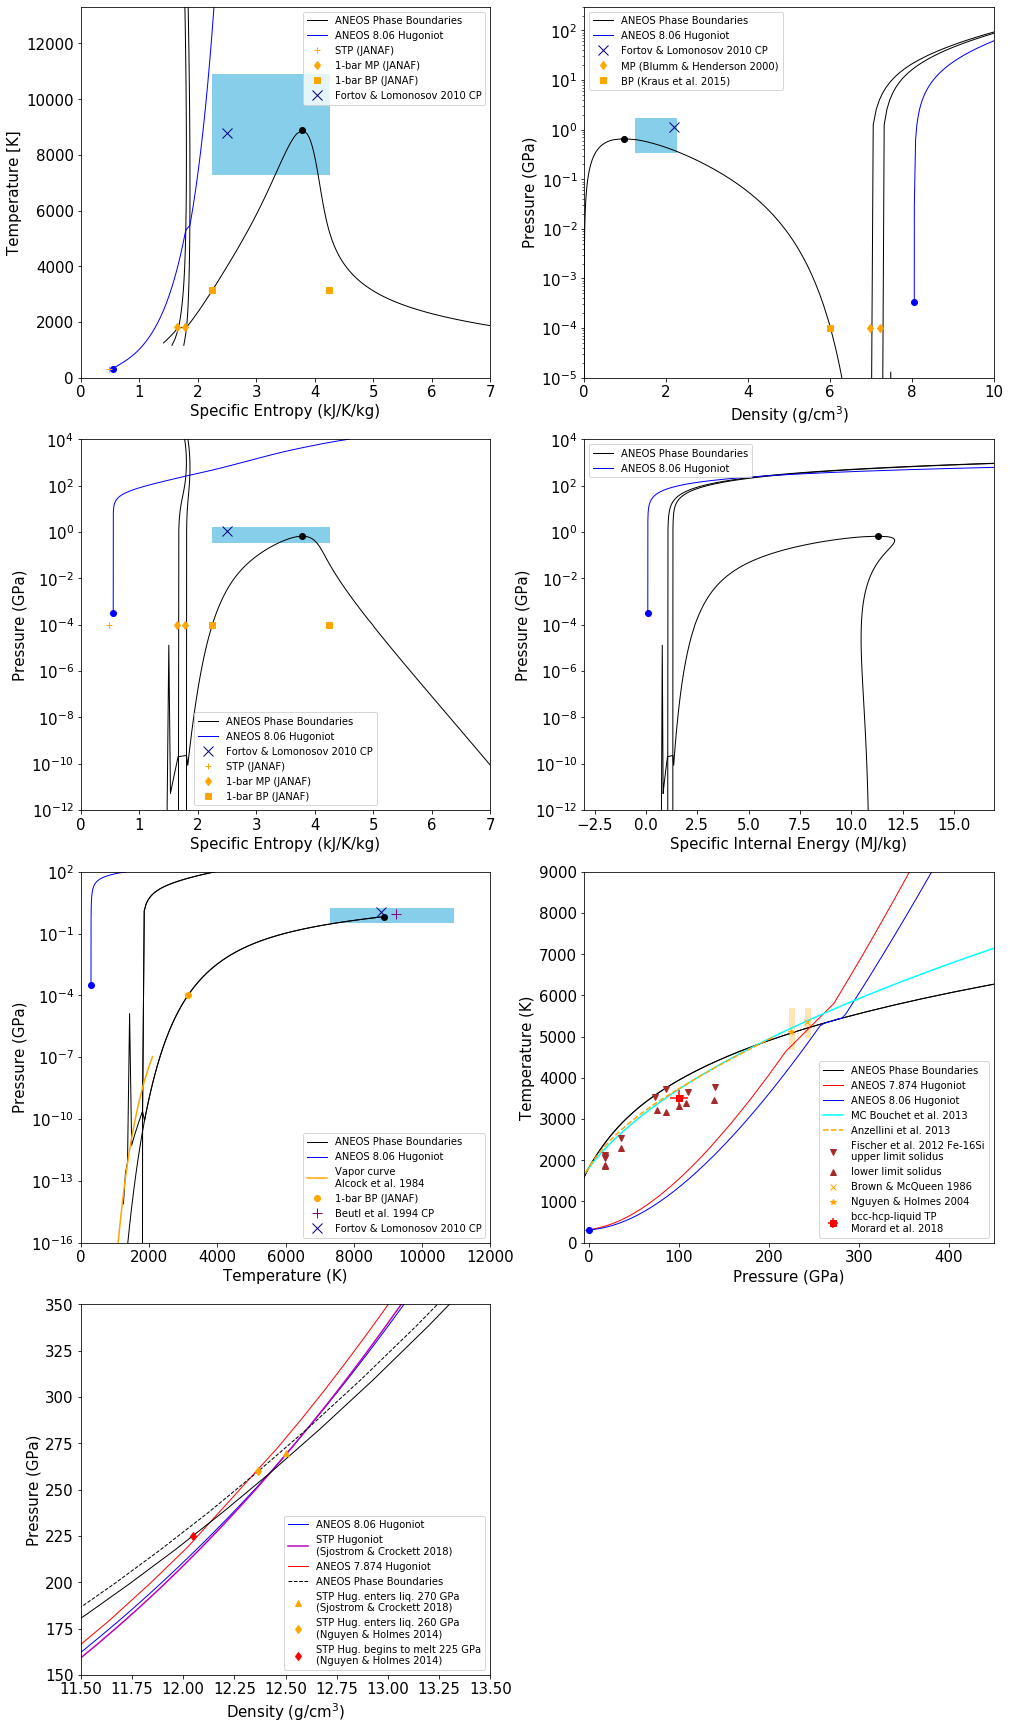

In [16]:
# PHASE DIAGRAM PLOTS
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,7)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(0,10)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.E3,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-12,10000)
axes[ai,aj].set_xlim(0,7)

#-----------
# specific energy - pressure
ai=1
aj=1
axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.U[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Internal Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-12,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*1.5)

#-------
# temperature - pressure
ai=2
aj=0
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,12000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.T,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])

axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,450)

#-------
# density - pressure melt curve
ai=3
aj=0

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])
axes[ai,aj].plot(scironrarr,scironparr,'-',color='m',label='STP Hugoniot\n(Sjostrom & Crockett 2018)')
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])


if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,'--',color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(150,350)
axes[ai,aj].set_xlim(11.5,13.5)

#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,7300.),2.,3600,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
   
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,298,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1809,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1809,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,3133,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,3133,'s',color='orange')

    axes[0,0].plot(2.496,8787,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)
    #EOS parameters of the critical point for iron Pc = 1.131 GPa, Tc = 8,787 K, Vc = 0.458cm3/g, Sc = 2.496 J/g/K

    # density-pressure [0,1]
    ai=0
    aj=1    
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((1.24,.356),1.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    axes[ai,aj].plot(2.1834,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)


    # 99.99% Fe melting volume at 1 bar from Blumm & Henderson 2000 3.46%, approx 7.175 g/cm3 for solid at melt pt
    axes[ai,aj].plot([6.98,6.98*(1.0346)],[1.E-4,1.E-4],'d',color='orange',label='MP (Blumm & Henderson 2000)')

    # 1-bar Fe liquid at boiling point calculation Kraus et al. 2015
    axes[ai,aj].plot([6.01],[1.E-4],'s',color='orange',label='BP (Kraus et al. 2015)')

    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,.356),2.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(2.496,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)

    
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,1.E-4,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1.E-4,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1.E-4,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,1.E-4,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,1.E-4,'s',color='orange')

    # temperature -- pressure [2,0]
    ai=2
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((7300.,.356),3600,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    # plot Fe experimentally fitted vapor curve from Alcock et al. 1984
    alcocktarr = np.arange(2100)+1
    # Fe solid good from 298 to melting point
    A=7.1
    B=-21723.
    C=0.4536
    D=-0.5846
    alcockfesolidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    # Fe liquid good from melting point to 2100 K
    A=6.347
    B=-19574
    C=0.
    D=0.
    alcockfeliquidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    axes[ai,aj].plot(alcocktarr[298:1809],alcockfesolidparr[298:1809],color='orange',label='Vapor curve\nAlcock et al. 1984')
    axes[ai,aj].plot(alcocktarr[1809:2100],alcockfeliquidparr[1809:2100],color='orange')
    axes[ai,aj].plot([3133.345],[1.e-4],'o',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(9250.,8750.e-4,'+',color='purple',label='Beutl et al. 1994 CP',markersize=10)
    axes[ai,aj].plot(8787,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)


    # pressure- temperature [2,1]
    ai=2
    aj=1
    
    # Bouchet et al. PRB 2013 ab initio Fe melt curve calculations. HCP to 1500 GPa
    bouchet_temp = np.arange(13000)
    bouchet_pressure = (np.power(bouchet_temp/1809.,1.99)-1.)*31.3+0.
    axes[ai,aj].plot(bouchet_pressure,bouchet_temp,'-',color='cyan',label='MC Bouchet et al. 2013')
    #axes[ai,aj].plot(341.,6500.,'^',color='cyan')

    # Anzellini et al. 2013 Science iron melt curve high pressure region up to 200 GPa/5000 K
    anzmct3arr = (np.arange(100)+1.)/100.*1300.+3700 # K
    anzmcp3arr = (np.power(anzmct3arr/3712.,1.72)-1.)*161.2 + 98.5 # GPa
    anzmct2arr = (np.arange(100)+1.)/100.*3700. # K
    anzmcp2arr = (np.power(anzmct2arr/1991.,2.38)-1.)*27.39 + 5.2 # GPa
    axes[ai,aj].plot(anzmcp3arr,anzmct3arr,color="orange",linestyle='--',label='Anzellini et al. 2013')
    axes[ai,aj].plot(anzmcp2arr,anzmct2arr,color="orange",linestyle='--')

    #Fischer et al. 2012 Fe-Si alloys
    # example solidus of an iron alloy
    fischerparrlow = Fischer_datalow.iloc[:,0].values # P GPa
    fischertarrlow = Fischer_datalow.iloc[:,1].values # T K
    fischerparrhigh = Fischer_datahigh.iloc[:,0].values # P GPa
    fischertarrhigh = Fischer_datahigh.iloc[:,1].values # T K

    axes[ai,aj].plot(fischerparrhigh,fischertarrhigh,'v',color="brown",label='Fischer et al. 2012 Fe-16Si\nupper limit solidus')
    axes[ai,aj].plot(fischerparrlow,fischertarrlow,'^',color="brown",label='lower limit solidus')

    rect = Rectangle((240.,5000.),6.,700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(243.,5350,'x',color='orange',label='Brown & McQueen 1986')
    rect = Rectangle((222.,4700),6.,1000,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(225.,5100,'*',color='orange',label='Nguyen & Holmes 2004')

    axes[ai,aj].errorbar(100.,3500.,xerr=10.,yerr=200,fmt='s',color='red',label='bcc-hcp-liquid TP\nMorard et al. 2018')

    
    # density - pressure [3,0]
    ai=3
    aj=0
    axes[ai,aj].plot(12.5,270.,'^',color='orange',label='STP Hug. enters liq. 270 GPa\n(Sjostrom & Crockett 2018)',markersize=6)
    if NewEOS.tp.T > 0:
        axes[ai,aj].plot(np.interp(260.,NewEOS.mc.Pl,NewEOS.mc.rl),260.,'d',color='orange',label='STP Hug. enters liq. 260 GPa\n(Nguyen & Holmes 2014)',markersize=6)
        axes[ai,aj].plot(np.interp(225.,NewEOS.mc.Ps,NewEOS.mc.rs),225.,'d',color='red',label='STP Hug. begins to melt 225 GPa\n(Nguyen & Holmes 2014)',markersize=6)
    
# don't show a plot in lower right
axes[3,1].axis("off")

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)
plt.savefig('iron-v0.2-phase-diagram.pdf', format='pdf', dpi=1000,transparent=True)
#--------


## ANEOS model comparisons to experimental data

The Debye temperature of the solid is adjusted to provide the correct specific entropy at the melting point. The specific heat capacity adjustment in this model provides a reasonable match to the liquid region at 1 bar.

Using a gamma-iron model produces the correct density at the melt curve for the bulk modulus used to span the solid and liquid fields. The volume change on melting iron is about 3.4% (Askeland 1996); Blumm & Henderson (2000) found a volume change of 3.46% for 99.99% purity Fe.

The specific entropy of the vapor side of the liquid-vapor dome is larger than the 1-bar experimental constraint.

Dorogokupets et al. 2017 calculated the isotherm for liquid iron at 2200 K. The ANEOS model is a good fit (and then enters the solid phase). 

Anzellini et al. (2013) estimated that the temperature at the core-mantle boundary is about 4050 K. Here, I plot the ANEOS isentrope through the nearest gridded temperature point at 4080 K and 136 GPa and compare the isentrope to PREM (http://ds.iris.edu/spud/earthmodel/9785674). As expected, the ANEOS model isentrope is denser than Earth's core. The ANEOS model isentropes have densities that are similar to PREM for an outer core with a 8-10% reduction in density, and the densities are slightly lower than the inner-core with a 4% reduction in density. The inferred density reductions due to light elements in the core are from Birch 1964 and Lin et al. 2003.

In [17]:
# INCLUDE A COMPARISON TO EARTH'S STRUCTURE PREM MODEL
G = 6.67E-11 # Gravitational constant  m3/kg/s2

# Read in PREM: Preliminary Earth Reference Model
PREM_filename=datadir+'PREM500_IDV.csv' # we love long, readable variable names!

# make a class to hold the PREM data
class PREMclass:
    """Class to hold PREM data and other 1-D Earth variables."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.NR = 0 # number of radius points
        self.radius = np.zeros(self.NR) 
        self.density = np.zeros(self.NR)   
        self.pwavevel = np.zeros(self.NR)   
        self.swavevel = np.zeros(self.NR)
        self.pressure = np.zeros(self.NR)
        self.temperature = np.zeros(self.NR)
        # not going to use all the variables in the file
        self.units = '' # I like to keep a text note in a structure about the units

# initialize an empty PREM object
PREM = PREMclass()

# read the data into the class parameters
PREM.radius = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[0]) # radius in m
PREM.density = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[1]) # density in kg/m3
PREM.pwavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[2]) # p-wave velocity m/s
PREM.swavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[3]) # s-wave velocity m/s
PREM.NR = len(PREM.radius) # number of radius points
PREM.units = 'radius (m), density (kg/m3), pwavevel (m/s), swavevel (m/s)'

# start at the surface and integrate via a for loop to the center of the planet

# calculate the thickness of each layer in the PREM model using the roll function
PREM_dr = np.roll(PREM.radius,-1)-PREM.radius 
PREM_dr[PREM.NR-1] = 0. # we are not using the last entry in the list because there are NR-1 layers
#print(PREM_dr)

# calculate the mass of each layer
# density x area x thickness of each layer
PREM_mass_rad = PREM.density*(4.*np.pi*PREM.radius*PREM.radius*PREM_dr) 

# Check that the total mass is the mass of the Earth
#print('PREM total mass (kg)=',np.sum(PREM_mass_rad))
#print('PREM total mass (Mearth)=',np.sum(PREM_mass_rad)/5.972E24)

PREM.pressure = np.zeros(PREM.NR) # make array of zeros for pressure of the same length as the arrays in the PREM model
# The first entry is the middle of the planet, so start at the surface and integrate inwards
for i in range(PREM.NR-2,0,-1):
    # we indent for the code in the for loop
    PREM.pressure[i] = PREM.pressure[i+1]+G*np.sum(PREM_mass_rad[0:i-1])*PREM.density[i]*PREM_dr[i]/PREM.radius[i]/PREM.radius[i]

# use SESAME units
PREM.pressure = PREM.pressure/1.E9 # GPa

IronEOS = NewEOS
# first extract the isentropes for the planet from the EOS tables
core = isentrope_class() # code in eostable.py
Score = 0.0022 # MJ/K/kg

# loop across all densities and extract the values for the requested isentrope
for i in range(0,IronEOS.ND):
    ind = np.where((IronEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.P[ind,i]) # MJ/K/kg, GPa
    core.pressure = np.append(core.pressure,interpfunction(Score)) # GPa
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.T[ind]) # MJ/K/kg, GPa
    core.temperature = np.append(core.temperature,interpfunction(Score)) # GPa
core.density = IronEOS.rho # g/cm3

#print('Calculated iron isentrope with ',np.round(np.interp(136.,core.pressure,core.temperature)),' K CMB temperature (P=136 GPa)')

# first extract the isentropes for the planet from the EOS tables
core2 = isentrope_class() # code in eostable.py
it0   = np.where(IronEOS.T >= 4050.)[0]
Score = np.interp(136.,IronEOS.P[it0[0],:],IronEOS.S[it0[0],:])
#Score = 0.00186 # MJ/K/kg

# loop across all densities and extract the values for the requested isentrope
for i in range(0,IronEOS.ND):
    ind = np.where((IronEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.P[ind,i]) # MJ/K/kg, GPa
    core2.pressure = np.append(core2.pressure,interpfunction(Score)) # GPa
    interpfunction = interpolate.interp1d(IronEOS.S[ind,i],IronEOS.T[ind]) # MJ/K/kg, GPa
    core2.temperature = np.append(core2.temperature,interpfunction(Score)) # GPa
core2.density = IronEOS.rho # g/cm3
print('Calculated iron isentrope with ',np.round(np.interp(136.,core2.pressure,core2.temperature)),' K CMB temperature (P=136 GPa)')


Calculated iron isentrope with  4080.0  K CMB temperature (P=136 GPa)


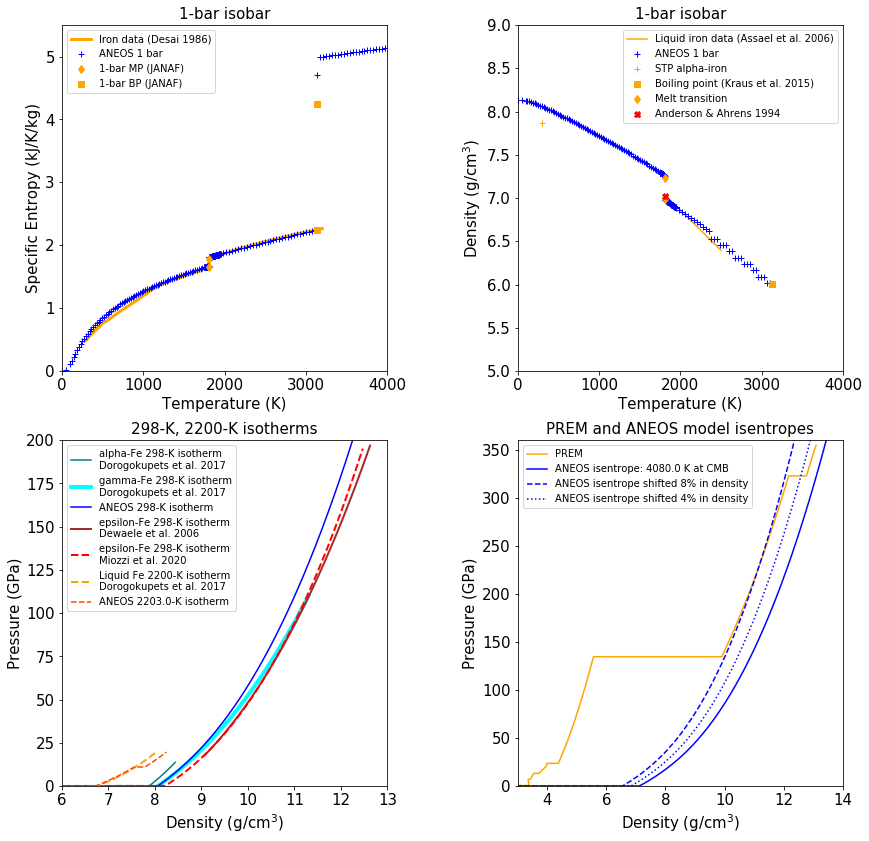

In [18]:
# 1-bar plots and 298 K plots

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)

#--------
# temperature - entropy at 1 bar
ai=0
aj=0


axes[ai,aj].plot(Desai_tarr,Desai_sarr,'-',color='orange',label='Iron data (Desai 1986)',linewidth=3)
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.E3,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].plot(1809.,99.823/NewEOS.FMW,'d',color='orange',label='1-bar MP (JANAF)')
axes[ai,aj].plot(1809.,92.190/NewEOS.FMW,'d',color='orange')
# Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
axes[ai,aj].plot(3133.,2.24,'s',color='orange',label='1-bar BP (JANAF)')
axes[ai,aj].plot(3133.,4.238,'s',color='orange')

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,5.5)
axes[ai,aj].set_xlim(0,4000)


#----
# density-temperature at 1 bar
ai=0
aj=1

axes[ai,aj].plot(Assael_tarr,Assael_rarr/1.e3,'-',color='orange',label='Liquid iron data (Assael et al. 2006)')
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.rho,'+',color='blue',label='ANEOS 1 bar')
axes[ai,aj].plot(298.,7.873,'+',color='orange',label='STP alpha-iron')
axes[ai,aj].plot([3133],[6.01],'s',color='orange',label='Boiling point (Kraus et al. 2015)')
# 3.4% volume change (Askeland 1996) with highest density from Assael et al. 2006
axes[ai,aj].plot([1809.,1809],[6.99,6.99*(1.034)],'d',color='orange',label='Melt transition')

axes[ai,aj].plot([1811.],[7.019],'X',color='red',label='Anderson & Ahrens 1994')


axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(5,9)
axes[ai,aj].set_xlim(0,4000)


#----
# density-pressure at 298 K
ai=1
aj=0


# Guinan & Beshers JPCS 1968 Fe 298 K isotherm
#K0T = 166.4 # GPa room temp isentrope
#K0Tp = 5.29
#R00 = 7.874
#print(R00)
GB_cs_stp = np.sqrt(166.4E9/7874.) # m/s
#print(GB_cs_stp)
#BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
#                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
#igood = np.where((BM_pressure < 14.6))[0]
#axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='orange',label='alpha-Fe 298-K isentrope\nGuinan & Beshers 1969')

# Dorogokupets et al. 2017
# alpha (bcc) iron 298 K 1 bar (low T is ferro; high T is para)
K0T = 164.001 # GPa room temp isotherm
K0Tp = 5.5
R00 = 7.8746
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 14.6))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='teal',label='alpha-Fe 298-K isotherm\nDorogokupets et al. 2017')

# Dorogokupets et al. 2017
# gamma (fcc) iron 298 K 1 bar
K0T = 146.2 # GPa room temp isotherm
K0Tp = 4.67
R00 = 8.06
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 110))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='cyan',linewidth=4,label='gamma-Fe 298-K isotherm\nDorogokupets et al. 2017')

iT0REF = np.where(NewEOS.T == T0REF)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-',color='blue',label='ANEOS 298-K isotherm')

# Dewaele et al. PRL 2006 Fe 298 K isotherm
# espilon-iron (hcp)
K0T = 165 # fixed GPa room temp isotherm
K0Tp = 4.97 # +-0.04 fitted 
R00 = (NewEOS.FMW)*1.*1.6726/(11.234*1.E-3)/1.E3 # kg/m3->g/cm3 
#print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='brown',linewidth=2,label='epsilon-Fe 298-K isotherm\nDewaele et al. 2006')


# Miozzi et al. Minerals 2020, 10, 100; doi:10.3390/min10020100
# Fe 298 K isotherm. Using parameters from 3rd column in Table 1
# espilon-iron (hcp)
K0T = 134
K0Tp = 6.1 # +-0.04 fitted 
R00 = (NewEOS.FMW)*2.*1.6726/(22.75*1.E-3)/1.E3 # kg/m3->g/cm3 
#print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 0.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='red',linewidth=2,label='epsilon-Fe 298-K isotherm\nMiozzi et al. 2020')


'''
# error bars Dewaele et al. PRL 2006 Fe 298 K isotherm
K0Tp = 4.97-0.04 # +-0.04 fitted 
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='brown')
# error bars Dewaele et al. PRL 2006 Fe 298 K isotherm
K0Tp = 4.97+0.04 # +-0.04 fitted 
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 17.)&(BM_pressure < 197.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='brown')
'''

#------ LIQUID
# Dorogokupets et al. 2017
# liquid iron 2200 K 1 bar
K0T = 65.2 # GPa isotherm
K0Tp = 6.48
R00 = 7.019/1.04
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure < 20))[0]
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'--',color='orange',linewidth=2,label='Liquid Fe 2200-K isotherm\nDorogokupets et al. 2017')

# plot liquid isotherm
it0 = np.where(NewEOS.T >= 2200)[0]
#print('Liquid isotherm at (K) ',NewEOS.T[it0[0]])
igood = np.where((NewEOS.P[it0[0],:] < 20))[0]
axes[ai,aj].plot(NewEOS.rho[igood],NewEOS.P[it0[0],igood],'--',color='orangered',label='ANEOS '+str(np.round(NewEOS.T[it0[0]]))+'-K isotherm')


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('298-K, 2200-K isotherms',size=sfont)
axes[ai,aj].set_xlim(6,13)
axes[ai,aj].set_ylim(0,200)

#----
# density-pressure at 298 K
ai=1
aj=1

axes[ai,aj].plot(PREM.density[1::]/1.E3,PREM.pressure[1::],'-',color='orange',label='PREM')
#axes[ai,aj].plot(core.density,core.pressure,'-',color='blue',label='ANEOS '+str(np.round(np.interp(136,core.pressure,core.temperature)))+' K isentrope at CMB',markersize=10)
axes[ai,aj].plot(core2.density,core2.pressure,'-',color='blue',label='ANEOS isentrope: '+str(np.round(np.interp(136,core2.pressure,core2.temperature)))+' K at CMB',markersize=10)
axes[ai,aj].plot(0.92*core2.density,core2.pressure,'--',color='blue',label='ANEOS isentrope shifted 8% in density')

axes[ai,aj].plot(0.96*core2.density,core2.pressure,':',color='blue',label='ANEOS isentrope shifted 4% in density')


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('PREM and ANEOS model isentropes',size=sfont)
axes[ai,aj].set_xlim(3,14)
axes[ai,aj].set_ylim(0,360)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


## ANEOS Gruneisen parameter and Theta parameter for thermal model

The Gruneisen parameter for iron liquid has been determined experimentally from shock wave data (e.g., see Kraus et al. 2015). Shockwave data derive the Grueneisen parameter in reference to a known state:
\begin{equation}
\gamma = \frac{1}{\rho}\frac{(P-P_{\rm ref})}{(E-E_{\rm ref})} \bigg\rvert _V
\end{equation}

The ANEOS Gruneisen model is split into two parts. For $\rho \ge \rho_{0}$,
\begin{equation}
\gamma = \left( \frac{\gamma_0 \rho_0}{\rho}  + C_{24} \left( 1-\frac{\rho_0}{\rho} \right)^2 \right) (1-C_{60}) + \left( \gamma_0 + (C_{24}-\gamma_0) \left( 1- \frac{\rho_0}{\rho} \right)^2 \right) C_{60}.
\end{equation}
For $\rho < \rho_{0}$,
\begin{equation}
\gamma = C_{16} \rho^2 + C_{17}\rho + 1 + C_{61}.
\end{equation}

$C_{16}$ and $C_{17}$ are calculated so that $\gamma$ and $d \gamma / d \rho$ are continuous at $\rho=\rho_0$. The model asymptotes to the Thomas-Fermi limit ($\gamma=2/3$) when $C_{24}=2/3$.

The gamma function developed by Kraus et al. 2015 (SOM equation 5) is also shown for comparison. This function was derived from the abundant data on shocked porous iron. This calculation assumes E=0.

The literature values for the reference $\gamma_0$ of alpha-iron span 1.65 to 1.75: e.g., 1.65 Adams et al. 2006; 1.736 Dorogokupets et al. 2017; 1.75 Sjostrom & Crockett 2018.

Literature values for the reference $\gamma_0$ of gamma-iron include 2.28 (Tsujino et al. 2013); 2.205 (Dorogokupets et al. 2017); 2.35 (Sjostrom & Crockett 2018). 

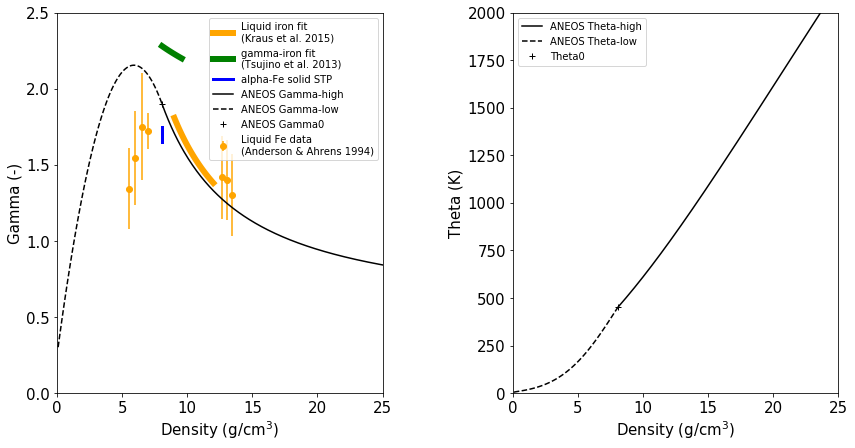

In [19]:
# plot the gamma and isotherms

# ANEOS Formulation for Gamma and theta
theta0=abs(NewEOS.theta0)
rhoarr = (1+np.arange(1000))/1000.*NewEOS.R0REF*10.
gammaarr = (NewEOS.gamma0*NewEOS.R0REF/rhoarr
           )+NewEOS.C24*np.power(1.0-NewEOS.R0REF/rhoarr,2.)*(1.-NewEOS.C60)+(NewEOS.gamma0 + (NewEOS.C24-NewEOS.gamma0)*np.power(1.-NewEOS.R0REF/rhoarr,2.))*NewEOS.C60
s3 = NewEOS.C61+1.
C14 = theta0 * np.exp(1.5*s3-(2.-0.5*NewEOS.C60)*NewEOS.gamma0)/(np.power(NewEOS.R0REF,s3))
C16 = (s3-(2.-NewEOS.C60)*NewEOS.gamma0)/(NewEOS.R0REF*NewEOS.R0REF)
C17 = ((3.-NewEOS.C60)*NewEOS.gamma0-2.*s3)/NewEOS.R0REF
gammaarrlow = C16*rhoarr*rhoarr+C17*rhoarr+s3
thetaarr = theta0*np.exp((1.-NewEOS.C60)*(1.-NewEOS.R0REF/rhoarr)*NewEOS.gamma0-0.5*(NewEOS.R0REF/rhoarr)*(3.-(NewEOS.R0REF/rhoarr)*(4-(NewEOS.R0REF/rhoarr))))*np.power((rhoarr/NewEOS.R0REF),NewEOS.C24)
thetalowarr = C14*np.exp(rhoarr*(C17+0.5*C16*rhoarr))*np.power(rhoarr,s3)


#-------- plots
sfont = 15
fig, axes = plt.subplots(1, 2, figsize=(14,7))
plt.subplots_adjust(wspace=0.4)


# -----
ai=0
indlow = np.where(rhoarr <= NewEOS.R0REF)
indhigh = np.where(rhoarr >= NewEOS.R0REF)


# Gamma from Kraus et al. 2015 SOM Equation 5
# this assumes E = 0. I dropped the exp(-phi*E) term. Phi=0.045 kg/MJ.
kraus_garr = 0.7+(2.1-0.7)*np.power(7.85/NewEOS.rho,1.7)
kraus_validrange = np.where((NewEOS.rho>9)&(NewEOS.rho<12))[0]
axes[ai].plot(NewEOS.rho[kraus_validrange],kraus_garr[kraus_validrange],'-',linewidth=6,color='orange',label='Liquid iron fit\n(Kraus et al. 2015)')

# gamma-iron grueneisen fit from Tsujino et al. 2013
tsujino_garr = 2.28*np.power(NewEOS.R0REF/NewEOS.rho,0.21)
tsujino_validrange = np.where((NewEOS.rho>8.06)&(NewEOS.rho<9.6))[0]
axes[ai].plot(NewEOS.rho[tsujino_validrange],tsujino_garr[tsujino_validrange],'-',linewidth=6,color='green',label='gamma-iron fit\n(Tsujino et al. 2013)')


axes[ai].set_ylim(0,2.5)
axes[ai].set_xlim(0,25)

# liquid iron at 1 bar 1811 K Anderson and Ahrens
#axes[ai,aj].plot([7.019],[1.735],'s',color='red',label='Liq. Iron 1811 K, 1 bar')
#axes[ai,aj].plot([5.5,6.0,6.5,7.019,12.643,13.015,13.417],[1.344,1.547,1.751,1.723,1.419,1.401,1.303],'o',color='red',label='Liquid Iron')
axes[ai].errorbar([5.5,6.0,6.5,7.019,12.643,13.015,13.417],[1.344,1.547,1.751,1.723,1.419,1.401,1.303], yerr=[0.269,0.309,0.350,0.116,0.272,0.265,0.269], fmt='o', color='orange', ecolor='orange', capthick=2,label='Liquid Fe data\n(Anderson & Ahrens 1994)')

# solid alpha-iron at STP
axes[ai].plot([NewEOS.R0REF,NewEOS.R0REF],[1.65,1.75],'-',linewidth=3,color='blue',label='alpha-Fe solid STP')

axes[ai].plot(rhoarr[indhigh[0]],gammaarr[indhigh[0]],label="ANEOS Gamma-high",color='black')
axes[ai].plot(rhoarr[indlow[0]], gammaarrlow[indlow[0]],label="ANEOS Gamma-low",color='black',ls='--')

axes[ai].plot(NewEOS.R0REF,NewEOS.gamma0,'+',label="ANEOS Gamma0",color='black')


axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Gamma (-)',size=sfont)
axes[ai].tick_params(labelsize=sfont)



# -----
ai=1
axes[ai].plot(rhoarr[indhigh[0]],thetaarr[indhigh[0]],label="ANEOS Theta-high",color='black')
axes[ai].plot(rhoarr[indlow[0]],thetalowarr[indlow[0]],label="ANEOS Theta-low",color='black',ls='--')
axes[ai].plot(NewEOS.R0REF,theta0,'+',label="Theta0",color='black')

axes[ai].set_ylim(0,2000)
axes[ai].set_xlim(0,25)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Theta (K)',size=sfont)
axes[ai].tick_params(labelsize=sfont)


axes[0].legend(fontsize=sfont-5)
axes[1].legend(fontsize=sfont-5)



# Specific Heat Capacity and Sounds Speeds



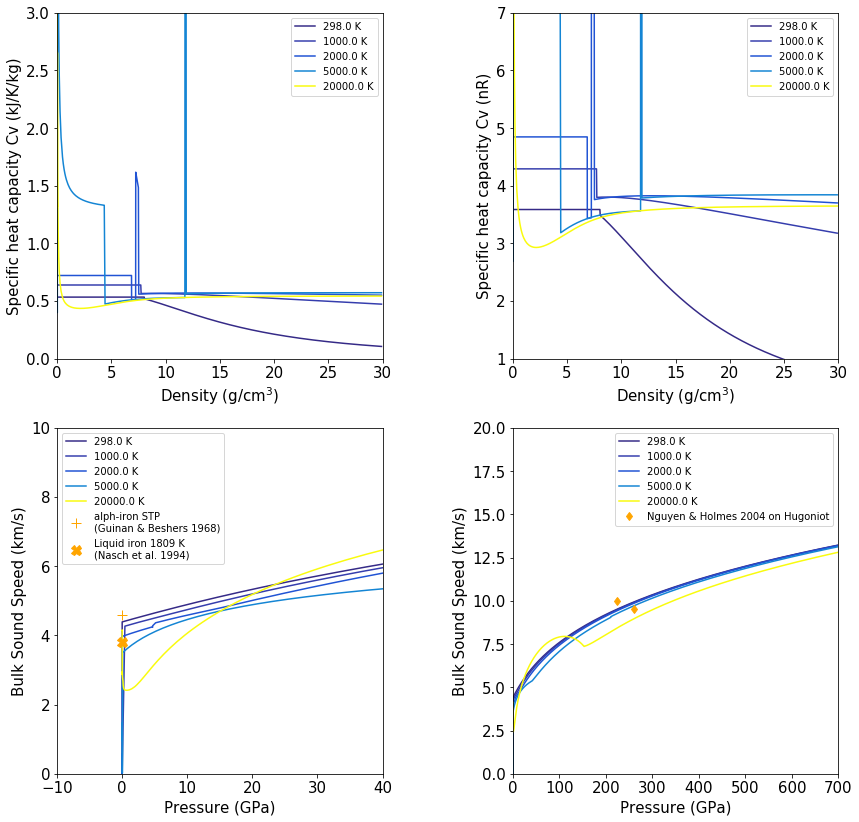

In [20]:

sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)


#-----------------------------
# Pick isotherms and set color scale
ixtemparr = [298.,1000.,2000.,5000.,20000.]
# set color scale same for all plots
tcolmin=0.
tcolmax=20000.

# find the index closest to the selected temperatures -- no interpolation
ixindarr=np.zeros(len(ixtemparr))
ixlabelarr = []
for i in np.arange(len(ixtemparr)):
    tmpi=int(np.round(np.interp(ixtemparr[i],NewEOS.T,np.arange(NewEOS.NT))))
    #print(tmpi,antarr[tmpi])
    ixindarr[i] = tmpi
    ixlabelarr.append(str(ixtemparr[i])+' K')


#-----------------------
ai=0
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.,c=col,linestyle='-',label=ixlabelarr[i])

#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1000.,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1.73736,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 20133)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/1.E3,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(0.,3.)
axes[ai,aj].set_xlim(0,30)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
ai=0
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.*1000./1/8.314*NewEOS.FMW/1000.,c=col,linestyle='-',label=ixlabelarr[i])


#axes[ai,aj].plot(QMDH_r1,QMDH_cv*1.E6/7/8.314*0.14,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
#axes[ai,aj].plot(2.597,1737./7/8.314*0.140,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 2013)')
#axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/7/8.314*0.140,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,7.)
axes[ai,aj].set_xlim(0,30)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (nR)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
# plot sound speed along isotherms
ai=1
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.E-4,GB_cs_stp/1.e3,'+',markersize=10,color='orange',label='alph-iron STP\n(Guinan & Beshers 1968)')
axes[ai,aj].plot(1.E-4,3.82,'X',markersize=10,color='orange',label='Liquid iron 1809 K\n(Nasch et al. 1994)')


axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(-10,40)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-----------------------
# plot sound speed along isotherms
ai=1
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot([225,260],[10,9.5],'d',color='orange',label='Nguyen & Holmes 2004 on Hugoniot')


axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlim(0,700)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


# Compare to Tillotson Iron EOS

# Tillotson parameters for iron

Tillotson is a simple pressure-volume-internal energy equation of state model that was developed for metals (Tillotson 1962). Temperature is typically approximated by a constant heat capacity. Here, I have not implemented a temperature calculation.

There are no true phase boundaries but there is a split in the EOS between condensed and gas regions with an interpolated region. 

Here are the material parameters selected for iron from Tillotson 1962:<br>
$\rho_0$ = Reference density at zero pressure = 7800 kg/m$^3$<br>
$A$ = Bulk modulus $K_0$ =  128e9 Pa<br>
$B$ = B constant = 105e9 Pa<br>
$E_0$ = E0 constant (NOT reference state specific internal energy) = 2.4e6 J/kg<br>
$a$ = a constant = 0.5 [-]<br>
$b$ = b constant = 1.5 [-]<br>
$\alpha$ = $\alpha$ constant = 5 [-]<br>
$\beta$ = $\beta$ constant = 5 [-]<br>
$E_{IV}$ = specific internal energy of incipient vaporization = 2.4e6 J/kg<br>
$E_{CV}$ = specific internal energy of complete vaporization = 8.67e6 J/kg<p>

The sum of constants $a$ and $b$ is the Mie-Gruneisen parameter at the reference density: $a+b = \Gamma(\rho_0)$ <p>

Here, I have coded two different implementations of Tillotson: (1) from Hosono et al. Nature Geoscience 2019 and (2) from iSALE Dellen version. There are some slight differences but the overall topology of the EOS are the same. <p>
    
Because the Tillotson equations produce large negative pressure values when $\rho<\rho_0$ and $E<E_{CV}$, the EOS is implemented with a pressure minimum that varies between implementations and papers. In most published works, the interpolated region was calculated prior to resetting to a pressure minimum. <p>

The Tillotson functions are in the next code cell.

In [21]:
# Calculate a Tillotson EOS grid
# the grid is used to make some differential calculations below
# Tillotson EOS functions are in the file eostable.py

# dunite tillotson parameters used by Hosono et al. 2019 
# are taken from the olivine parameters in Marinova et al. 2011 Icarus 
# parameters: [rho0, E0, EIV, ECV, AA, BB, a, b, alpha, beta]
# units:    [kg/m3, J/kg, J/kg, J/kg, Pa, Pa, [-]x4]
olivinetill = [3500.0, 550.0e+6, 4.500e+6, 14.50e+6, 131.00e+9,  49.00e+9, 0.5, 1.4, 5.0, 5.0]
# Basalt parameters from iSALE -- from where? Benz?
#basalttill = [2650.0, 4.87E8, 4.72E6, 18.2E6, 5.3E10, 5.3E10, 0.6, 0.6, 5., 5.]
# iron from Tillotson 1962
irontill = [7800.0, 9.5e+6, 2.400e+6, 8.670e+6, 128.00e+9,  105.00e+9, 0.5, 1.5, 5.0, 5.0]


#-------------------------
# Make a class to hold the Tillotson EOS using Hosono functions

TillEOS     = TillotsonClass() # initialize empty structure
TillEOS.ND  = NewEOS.ND 
TillEOS.NU  = len(tillearr) 
TillEOS.rho = NewEOS.rho    # g/cm3  Use same density array as ANEOS SESAME table
TillEOS.U   = tillearr      # MJ/kg  Grid set up in the grid code cell near top of this notebook
TillEOS.FillTable(matparams=irontill,modelname='Iron Tillotson 1962') # This function uses Hosono's EOS implementation
TillEOS.calchugoniot(r00=irontill[0]/1.E3,e0=0) # calculate the principal Hugoniot



Using standard Tillotson implementation (e.g., Hosono et al. 2019, Melosh 1989).
Tillotson parameters:  [7800.0, 9500000.0, 2400000.0, 8670000.0, 128000000000.0, 105000000000.0, 0.5, 1.5, 5.0, 5.0]
calchugoniot: 348 0 7.8095 0.15605319280078267 0.0 0.0 4.059927630983903
Done calculating Hugoniot with Tillotson EOS table.


In [22]:
# Load older ANEOS models for comparison
# Load in Canup 2013 model
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
subdir = './aneos-canup/'
MODELNAME = 'IRON WITH MELT CURVE'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 191022.     # Date as a single 6-digit number YYMMDD
VERSION = 1.0      # ANEOS Parameters Version number
FMN = 26.          # Formula weight in atomic numbers for Mg2SiO4
FMW = 55.847       # Formula molecular weight (g/cm3) for Mg2SiO4
# The following define the default initial state for material in the 201 table
R0REF   = 7.85     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 1.45E12  # dynes/cm2  K0=rho0*cs0^2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below

CanupEOS  = extEOStable() # FIRST make new empty EOS object
CanupEOS.loadextsesame(subdir+'NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
CanupEOS.loadstdsesame(subdir+'NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
CanupEOS.MODELNAME = MODELNAME # string set above in user input
CanupEOS.MDQ = np.zeros((CanupEOS.NT,CanupEOS.ND)) # makes the empty MDQ array
#print(CanupEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
CanupEOS.MATID   = MATID
CanupEOS.DATE    = DATE
CanupEOS.VERSION = VERSION
CanupEOS.FMN     = FMN
CanupEOS.FMW     = FMW
CanupEOS.R0REF   = R0REF
CanupEOS.K0REF   = K0REF
CanupEOS.T0REF   = T0REF
CanupEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
CanupEOS.loadaneos(aneosinfname=subdir+'ANEOS.INPUT',aneosoutfname=subdir+'ANEOS.OUTPUT',silent=True)
#
# calculate the principal Hugoniot from the table
CanupEOS.calchugoniot(r0=CanupEOS.R0REF,t0=CanupEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
CanupEOS.onebar.T = np.zeros(CanupEOS.NT)
CanupEOS.onebar.S = np.zeros(CanupEOS.NT)
CanupEOS.onebar.rho = np.zeros(CanupEOS.NT)
it0 = np.where(CanupEOS.T >= CanupEOS.T0REF)[0]
id0 = np.arange(CanupEOS.ND)#np.where(CanupEOS.rho >= 0.8*CanupEOS.R0REF)[0]
for iit in range(0,CanupEOS.NT):
    CanupEOS.onebar.T[iit] = CanupEOS.T[iit]
    CanupEOS.onebar.S[iit] = np.interp(1.E-4,CanupEOS.P[iit,id0],CanupEOS.S[iit,id0])
    CanupEOS.onebar.rho[iit] = np.interp(1.E-4,CanupEOS.P[iit,id0],CanupEOS.rho[id0])
    #print(iit,CanupEOS.onebar.rho[iit],CanupEOS.onebar.T[iit],CanupEOS.onebar.S[iit]*1.E3)


In [23]:
# Load older ANEOS models for comparison
# Load in GADGET model (Robert Marcus Thesis; Cuk & Stewart 2012)
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
subdir = './aneos-T70/'
MODELNAME = 'IRON 130PT Thompson 1970'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 191022.     # Date as a single 6-digit number YYMMDD
VERSION = 1.0      # ANEOS Parameters Version number
FMN = 26.          # Formula weight in atomic numbers for Mg2SiO4
FMW = 55.847       # Formula molecular weight (g/cm3) for Mg2SiO4
# The following define the default initial state for material in the 201 table
R0REF   = 7.85     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 1.93E12  # dynes/cm2  K0=rho0*cs0^2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below

GadgetEOS  = extEOStable() # FIRST make new empty EOS object
GadgetEOS.loadextsesame(subdir+'NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
GadgetEOS.loadstdsesame(subdir+'NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
GadgetEOS.MODELNAME = MODELNAME # string set above in user input
GadgetEOS.MDQ = np.zeros((GadgetEOS.NT,GadgetEOS.ND)) # makes the empty MDQ array
#print(GadgetEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
GadgetEOS.MATID   = MATID
GadgetEOS.DATE    = DATE
GadgetEOS.VERSION = VERSION
GadgetEOS.FMN     = FMN
GadgetEOS.FMW     = FMW
GadgetEOS.R0REF   = R0REF
GadgetEOS.K0REF   = K0REF
GadgetEOS.T0REF   = T0REF
GadgetEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
GadgetEOS.loadaneos(aneosinfname=subdir+'ANEOS.INPUT',aneosoutfname=subdir+'ANEOS.OUTPUT',silent=True)
#
# calculate the principal Hugoniot from the table
GadgetEOS.calchugoniot(r0=GadgetEOS.R0REF,t0=GadgetEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
GadgetEOS.onebar.T = np.zeros(GadgetEOS.NT)
GadgetEOS.onebar.S = np.zeros(GadgetEOS.NT)
GadgetEOS.onebar.rho = np.zeros(GadgetEOS.NT)
it0 = np.where(GadgetEOS.T >= GadgetEOS.T0REF)[0]
id0 = np.arange(GadgetEOS.ND)#np.where(GadgetEOS.rho >= 0.8*GadgetEOS.R0REF)[0]
for iit in range(0,GadgetEOS.NT):
    GadgetEOS.onebar.T[iit] = GadgetEOS.T[iit]
    GadgetEOS.onebar.S[iit] = np.interp(1.E-4,GadgetEOS.P[iit,id0],GadgetEOS.S[iit,id0])
    GadgetEOS.onebar.rho[iit] = np.interp(1.E-4,GadgetEOS.P[iit,id0],GadgetEOS.rho[id0])
    #print(iit,GadgetEOS.onebar.rho[iit],GadgetEOS.onebar.T[iit],GadgetEOS.onebar.S[iit]*1.E3)


## Comparisons between different iron EOS models used in giant impact calculations

Giant impacts have used the iron Tillotson EOS and at least two versions of ANEOS iron: the original iron with 130 kbar phase transition included in the Thompson 1970 ANEOS release (labelled T70 model below/) and an iron with melt curve model by E. Pierazzo and H.J. Melosh circa 2001 that was used in the Canup giant impact papers (labelled PMC model below). See the individual notebooks for these other iron ANEOS parameter sets in the subdirectories of the github repository. 

This is Figure XXX in Stewart, The Thermodynamics of Giant Impacts, in prep.

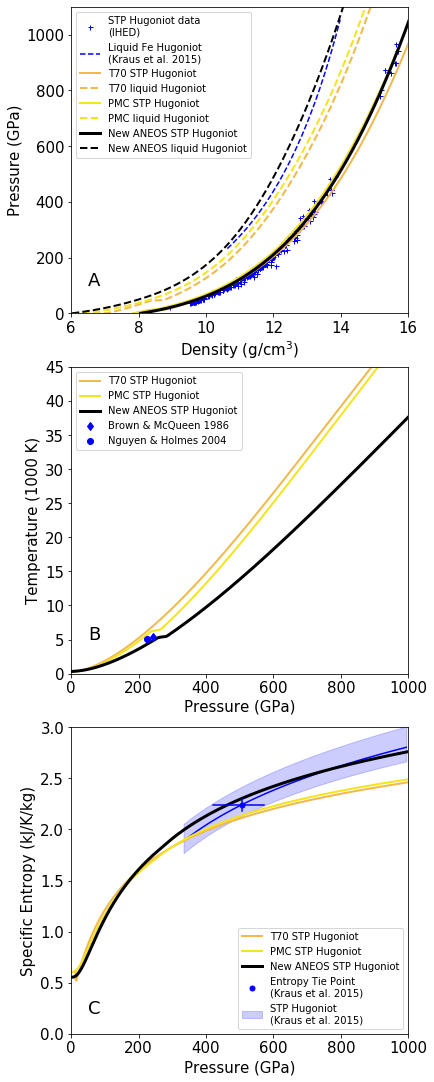

In [24]:

# colors for different data
colid = [0,.1,.3,.65,.80,.95]
labid = ['New ANEOS STP Hugoniot','Z fit Hugoniot','Gas gun Hugoniot','Ivanov Hugoniot','T70 STP Hugoniot','PMC STP Hugoniot','Tillotson Hugoniot']
labid2 = ['New ANEOS 1-bar','Z fit','Gas gun data','Ivanov 1-bar','T70 1-bar','P-M 1-bar','Tillotson 1-bar']
linid = ['-','-','+','-','-','-']
thiid = [3,5,2,2,2,2]
msize = 3
labsize=18

#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,15))
plt.subplots_adjust(wspace=0.25)

# make the line colors and such consistent across all the plots
style1 = ['-','blue',3,'Tabulated STP Hugoniot'] # eos table interpolated STP Hugoniot
style3 = ['-','red',3,'ANEOS Hugoniot'] # ANEOS Hugoniot returned from ANHUG in ANEOS.OUTPUT
style4 = ['-','orange',3,'ANEOS Liquid Hugoniot'] # ANEOS Hugoniot returned from ANHUG in ANEOS.OUTPUT for liquid initial conditions, stored as a file

#-------------
# A Density-Pressure Hugoniot
ai=0
aj=0

# Plot Tillotson
#axes[aj].plot(TillEOS.hug.rho,TillEOS.hug.P,'--',color='gray',label='Tillotson Hugoniot')

# Plot IHED data
axes[aj].plot(ihed_datarr[ihed_fullden,4]*ihed_rho0,ihed_datarr[ihed_fullden,3],stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
# Kraus Liquid Iron Hugoniot at 1 bar boiling point
axes[aj].plot(krausironliqrarr[40:100], krausironliqparr[40:100],styleliq[0],markersize=styleliq[2],color='blue',label='Liquid Fe Hugoniot\n(Kraus et al. 2015)')
                 #linestyle='-',color='cyan',label='Kraus et al. 2015\n1-bar Boiling Pt. Liquid Hugoniot')




# plot old ANEOS
# Ivanov ANEOS
#col=local_cmaps.parula(colid[3])
#axes[aj].plot(IvanovEOS.hug.rho,IvanovEOS.hug.P,linid[3],color=col,markersize=msize,label=labid[3],linewidth=thiid[3])
# Gadget ANEOS
col=local_cmaps.parula(colid[4])
axes[aj].plot(GadgetEOS.hug.rho,GadgetEOS.hug.P,linid[4],color=col,markersize=msize,label=labid[4],linewidth=thiid[4])
GadgetEOS.calchugoniot(r0=ironliq_r0,t0=ironliq_t0)
axes[aj].plot(GadgetEOS.hug.rho,GadgetEOS.hug.P,'--',color=col,markersize=msize,label='T70 liquid Hugoniot',linewidth=thiid[4])
GadgetEOS.calchugoniot(r0=GadgetEOS.R0REF,t0=GadgetEOS.T0REF)


# Canup et al. 2013 parameters
col=local_cmaps.parula(colid[5])
axes[aj].plot(CanupEOS.hug.rho,CanupEOS.hug.P,linid[5],color=col,markersize=msize,label=labid[5],linewidth=thiid[5])

CanupEOS.calchugoniot(r0=ironliq_r0,t0=ironliq_t0)
axes[aj].plot(CanupEOS.hug.rho,CanupEOS.hug.P,'--',color=col,markersize=msize,label='PMC liquid Hugoniot',linewidth=thiid[5])
CanupEOS.calchugoniot(r0=CanupEOS.R0REF,t0=CanupEOS.T0REF)





#new ANEOS
axes[aj].plot(NewEOS.hug.rho,NewEOS.hug.P,style1[0],color='black',markersize=style1[2],label=labid[0],linewidth=thiid[0])


# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=ironliq_r0,t0=ironliq_t0)
axes[aj].plot(NewEOS.hug.rho,NewEOS.hug.P,'--',linewidth=2,color='black',label='New ANEOS liquid Hugoniot')
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)



# plot data on top
# QMD points Root et al. 2013
#axes[aj].plot(QMDH_r[1::],QMDH_p[1::],'x',markersize=6,color='darkred',label='QMD')
# Z data points Root et al. 2013
#col=local_cmaps.parula(colid[1])
#axes[aj].errorbar(Zdat_r,Zdat_p,xerr=Zdat_rerr, yerr=Zdat_perr,fmt='o', label="Z data", color=col, elinewidth=1)
# gas gun data Mosenfelder et al. 2007
#col=local_cmaps.parula(colid[2])
#axes[aj].plot(LowHugDat_r,LowHugDat_p,'+',color=col,label='Gas gun data')

axes[aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[aj].tick_params(labelsize=sfont)
axes[aj].set_ylim(0,1100)
axes[aj].set_xlim(6.,16.)
axes[aj].text(6.5, 100, 'A', fontsize=labsize)
axes[aj].legend(fontsize=sfont-5)

#-------------
# B pressure - temperature Hugoniots
ai=0
aj=1

# plot old Hugoniots first
#col=local_cmaps.parula(colid[3])
#axes[aj].plot(IvanovEOS.hug.P,IvanovEOS.hug.T/1.E3,linid[3],color=col,markersize=msize,label=labid[3],linewidth=thiid[3])
col=local_cmaps.parula(colid[4])
axes[aj].plot(GadgetEOS.hug.P,GadgetEOS.hug.T/1.e3,linid[4],color=col,markersize=msize,label=labid[4],linewidth=thiid[4])
col=local_cmaps.parula(colid[5])
axes[aj].plot(CanupEOS.hug.P,CanupEOS.hug.T/1.e3,linid[5],color=col,markersize=msize,label=labid[5],linewidth=thiid[5])


#new ANEOS Hugoniot
axes[aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.e3,style1[0],color='black',markersize=style1[2],label=labid[0],linewidth=thiid[0])

rect = Rectangle((240.,5.),6.,.700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
axes[aj].add_patch(rect)
axes[aj].plot(243.,5.350,'d',color='blue',label='Brown & McQueen 1986')
#rect = Rectangle((222.,4.7),6.,1.000,linewidth=1,edgecolor='blue',facecolor='moccasin',alpha=0.2)
#axes[aj].add_patch(rect)
axes[aj].plot(225.,5.100,'o',color='blue',label='Nguyen & Holmes 2004')


axes[aj].set_xlim(0,1000)
axes[aj].set_ylim(0,45)
axes[aj].text(50, 5., 'B', fontsize=labsize)
axes[aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[aj].tick_params(labelsize=sfont)
axes[aj].legend(fontsize=sfont-5)


#-------------
# C Pressure - Sp. Entropy Hugoniots
ai=0
aj=2

colstr='blue'
axes[aj].plot(krausironparr[40:80], krausironsarr[40:80]/1.e3, linestyle='-',color=colstr)
#axes[aj].plot(krausironparr[40:80], krausironsarr[40:80]/1.e3, linestyle='-',color=colstr,label='Kraus et al. 2015\nLiquid Region STP Hugoniot')
#axes[aj].plot(krausironparr[40:80], krausironsuarr[40:80]/1.e3, linestyle=':',color=colstr)
#axes[aj].plot(krausironparr[40:80], krausironslarr[40:80]/1.e3, linestyle=':',color=colstr)
axes[aj].fill_between(krausironparr[40:80],krausironslarr[40:80]/1.e3,krausironsuarr[40:80]/1.e3,color='blue',alpha=0.2,label='STP Hugoniot\n(Kraus et al. 2015)')


#col=local_cmaps.parula(colid[3])
#axes[aj].plot(IvanovEOS.hug.P,IvanovEOS.hug.S*1.e3,linid[3],color=col,markersize=msize,label=labid[3],linewidth=thiid[3])
col=local_cmaps.parula(colid[4])
axes[aj].plot(GadgetEOS.hug.P,GadgetEOS.hug.S*1.e3,linid[4],color=col,markersize=msize,label=labid[4],linewidth=thiid[4])
col=local_cmaps.parula(colid[5])
axes[aj].plot(CanupEOS.hug.P,CanupEOS.hug.S*1.e3,linid[5],color=col,markersize=msize,label=labid[5],linewidth=thiid[5])


#new
axes[aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.e3,style1[0],color='black',markersize=style1[2],label=labid[0],linewidth=thiid[0])

# Tie point from Kraus et al. 2015
axes[aj].plot(Ztie_p,Ztie_s*1.E3,'o',markersize=5,color='blue',label='Entropy Tie Point\n(Kraus et al. 2015)')
axes[aj].plot([Ztie_p+Ztie_perrlow,Ztie_p+Ztie_perrhigh],[Ztie_s*1.E3,Ztie_s*1.E3],'-',color='blue')
axes[aj].plot([Ztie_p,Ztie_p],[(Ztie_s-Ztie_serr)*1.E3,(Ztie_s+Ztie_serr)*1.E3],'-',color='blue')


axes[aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[aj].tick_params(labelsize=sfont)
axes[aj].set_ylim(0,3.)
axes[aj].set_xlim(0,1000)
axes[aj].text(50, .2, 'C', fontsize=labsize)
axes[aj].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)
plt.savefig('ANEOS-iron-Hugoniots.pdf', format='pdf', dpi=1000,transparent=True)



## Tillotson vs. ANEOS

See discussion in Stewart et al. (SCCM19) for the changes in material velocity associated with the presence of the vapor curve. The following plots illustrate how the Tillotson model does not capture the correct material velocities during decompression into the vapor dome.

The black box in (B) is the nonphysical interpolated region of the Tillotson EOS.

Tillotson Hugoniot starting pressure: 737.8095791422679
ANEOS Starting Pressure: 732.0
Tillotson Hugoniot starting pressure: 384.2120757960291
ANEOS Starting Pressure: 380.0


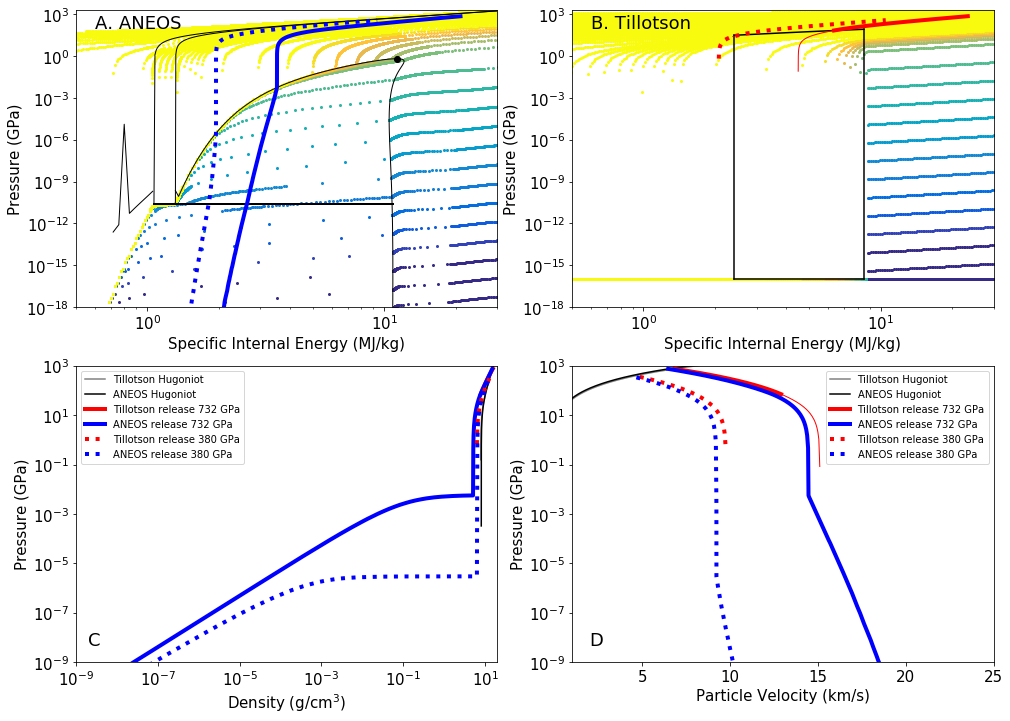

In [25]:
# make the line colors and such consistent across all the plots
style1 = ['-','blue',3,'Tabulated STP Hugoniot'] # eos table interpolated STP Hugoniot
#style2 = ['--','blue',3,'Tabulated Porous Hugoniot'] # eos table interpolated porous Hugoniot
style3 = ['-','red',3,'ANEOS Hugoniot'] # ANEOS Hugoniot returned from ANHUG in ANEOS.OUTPUT
style4 = ['-','orange',3,'ANEOS Liquid Hugoniot'] # ANEOS Hugoniot returned from ANHUG in ANEOS.OUTPUT for liquid initial conditions, stored as a file
#
#
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.subplots_adjust(wspace=0.25)

coltil="darkgrey"
dskip=10
relthick=4

# gather boundaries for the E-P box of the interpolated region in the Tillotson EOS
#    (dens < tilleos[r0]) and (eng < tilleos[ECV] and (eng > tilleos[EIV]))
zzz1 = np.where(TillEOS.U > irontill[2]/1.e6)
zzz2 = np.where(TillEOS.U < irontill[3]/1.e6)
tillintpmaxarr = np.zeros(max(zzz2[0])-min(zzz1[0]))
tillintpminarr = np.zeros(max(zzz2[0])-min(zzz1[0]))
tillintpminarr[:]=1.e-16 # GPa
tillintearr = np.zeros(max(zzz2[0])-min(zzz1[0]))
iiie=0
for iie in range(min(zzz1[0]),max(zzz2[0])):
    zzz3 = np.where(TillEOS.rho < irontill[0]/1.e3)
    #print(iie,till2earr[iie],max(till2parr[iie,zzz3[0]]))
    #axes[ai,aj].plot(till2earr[iie],max(till2parr[iie,zzz3[0]]),'o',color='black')
    tillintpmaxarr[iiie]=max(TillEOS.P[iie,zzz3[0]])
    tillintearr[iiie]=TillEOS.U[iie]
    iiie=iiie+1

#-------
#A. ANEOS Sp. Energy - pressure with isochores
ai=0
aj=0

# plot colored isochores
logdcolmin=-15
logdcolmax=-0.3
for iid in range(0,NewEOS.ND-1,dskip):
    if NewEOS.rho[iid] < 0.5:
        icolscale = (np.log10(NewEOS.rho[iid])-logdcolmin)/(logdcolmax-logdcolmin)*0.6
        if icolscale > 0.6:
            icolscale=0.6
        if icolscale < 0:
            icolscale=0
    else:
        icolscale = (NewEOS.rho[iid]-0.5)/(5-0.5)*0.4+0.6
        if icolscale > 1.:
            icolscale=1.
        if icolscale < 0.6:
            icolscale=0.6
        
    col=local_cmaps.parula(icolscale)
    #print(iid,andarr[iid],np.log10(andarr[iid]),icolscale)
    axes[ai,aj].loglog(NewEOS.U[:,iid],NewEOS.P[:,iid],'o',markersize=2,color=col)

# Plot aneos phase boundaries over the isochores
tmp = np.where((NewEOS.vc.Pl > 1.E-13)&(NewEOS.vc.T < NewEOS.tp.T))[0] # GPa
axes[ai,aj].plot(NewEOS.vc.Ul[tmp],NewEOS.vc.Pl[tmp],styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
tmp = np.where((NewEOS.vc.Pl >= NewEOS.tp.P)&(NewEOS.vc.T >= NewEOS.tp.T))[0] 
axes[ai,aj].plot(NewEOS.vc.Ul[tmp],NewEOS.vc.Pl[tmp],styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    tmp = np.where(NewEOS.mc.Pl > 0.)[0] # GPa
    axes[ai,aj].plot(NewEOS.mc.Ul[tmp],np.append(NewEOS.tp.P,NewEOS.mc.Pl[tmp[1::]]),styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us[tmp],np.append(NewEOS.tp.P,NewEOS.mc.Ps[tmp[1::]]),styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot([NewEOS.mc.Us[tmp[0]],np.interp(NewEOS.tp.P,NewEOS.vc.Pv,NewEOS.vc.Uv)],[NewEOS.tp.P,NewEOS.tp.P],'-',color='black',linewidth=2)

axes[ai,aj].set_ylim(1.e-18,2000.)
axes[ai,aj].set_xlim(0.5,30.)
axes[ai,aj].text(.6,100,'A. ANEOS',fontsize=labsize)
axes[ai,aj].set_xlabel('Specific Internal Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
#labsize2=14
#axes[ai,aj].text(2.1,1.e-6,'S',fontsize=labsize2)
#axes[ai,aj].text(2.9,1.e-6,'S+L',fontsize=labsize2)
#axes[ai,aj].text(4.05,1.e-6,'L',fontsize=labsize2)
#axes[ai,aj].text(12,1.e-6,'L+V',fontsize=labsize2)
#axes[ai,aj].text(25,1.e-6,'V',fontsize=labsize2)
#axes[ai,aj].text(12,1.e-12,'S+V',fontsize=labsize2)
# no legend
#axes[ai,aj].legend(fontsize=sfont-5)


#-------
# B sp. internal energy vs. pressure Tillotson isochores
ai=0
aj=1

logdcolmin=-15
logdcolmax=-0.3
for iid in range(0,TillEOS.ND-1,dskip):
    if TillEOS.rho[iid] < 0.5:
        icolscale = (np.log10(TillEOS.rho[iid])-logdcolmin)/(logdcolmax-logdcolmin)*0.6
        if icolscale > 0.6:
            icolscale=0.6
        if icolscale < 0:
            icolscale=0
    else:
        icolscale = (TillEOS.rho[iid]-0.5)/(5-0.5)*0.4+0.6
        if icolscale > 1.:
            icolscale=1.
        if icolscale < 0.6:
            icolscale=0.6

    col=local_cmaps.parula(icolscale)
    axes[ai,aj].loglog(TillEOS.U,TillEOS.P[:,iid],'o',markersize=2,color=col)

# Plot aneos phase boundaries over the isochores
#tmp = np.where((NewEOS.vc.Pl > 1.E-13)&(NewEOS.vc.T < NewEOS.tp.T))[0] # GPa
#axes[ai,aj].plot(NewEOS.vc.Ul[tmp],NewEOS.vc.Pl[tmp],styleanphase[0],color=coltil,linewidth=styleanphase[2])
#tmp = np.where((NewEOS.vc.Pl >= NewEOS.tp.P)&(NewEOS.vc.T >= NewEOS.tp.T))[0] 
#axes[ai,aj].plot(NewEOS.vc.Ul[tmp],NewEOS.vc.Pl[tmp],styleanphase[0],color=coltil,linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=coltil,linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=coltil,markersize=stylephasept[2])
#if NewEOS.tp.T > 0:
#    tmp = np.where(NewEOS.mc.Pl > 0.)[0] # GPa
#    axes[ai,aj].plot(NewEOS.mc.Ul[tmp],np.append(NewEOS.tp.P,NewEOS.mc.Pl[tmp[1::]]),styleanphase[0],color=coltil,linewidth=styleanphase[2])
#    axes[ai,aj].plot(NewEOS.mc.Us[tmp],np.append(NewEOS.tp.P,NewEOS.mc.Ps[tmp[1::]]),styleanphase[0],color=coltil,linewidth=styleanphase[2])
#    axes[ai,aj].plot([NewEOS.mc.Us[tmp[0]],np.interp(NewEOS.tp.P,NewEOS.vc.Pv,NewEOS.vc.Uv)],[NewEOS.tp.P,NewEOS.tp.P],'-',color=coltil,linewidth=2)

# draw a box around the interpolated region
axes[ai,aj].plot(tillintearr,tillintpmaxarr,'-',color='black')
axes[ai,aj].plot(tillintearr,tillintpminarr,'-',color='black')
axes[ai,aj].plot([min(tillintearr),min(tillintearr)],[1.e-16,min(tillintpmaxarr)],'-',color='black')
axes[ai,aj].plot([max(tillintearr),max(tillintearr)],[1.e-16,max(tillintpmaxarr)],'-',color='black')


axes[ai,aj].set_ylim(1.e-18,2000.)
axes[ai,aj].set_xlim(0.5,30.)
axes[ai,aj].set_xlabel('Specific Internal Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].text(.6,100.,'B. Tillotson',fontsize=labsize)
# no legend
#axes[ai,aj].legend(fontsize=sfont-5)


#--------------------------
# COMPARE ISENTROPES BETWEEN TILLOTSON AND ANEOS STARTING FROM NEAR 500 GPa
#
ptarget = 732.0 # GPa
# first extract the isentropes for the planet from the EOS tables
TillIsen = isentrope_class() # code in eostable.py
TillIsen.density = np.zeros(TillEOS.ND)
TillIsen.pressure = np.zeros(TillEOS.ND)
TillIsen.energy = np.zeros(TillEOS.ND)
TillIsen.soundspeed = np.zeros(TillEOS.ND)
TillIsen.partvel = np.zeros(TillEOS.ND)
TillIsen.region = np.zeros(TillEOS.ND)

# Tillotson Isentrope in MKS units
rhug = np.interp(ptarget,TillEOS.hug.P,TillEOS.hug.rho) # g/cm3
irh=int(np.round(np.where(TillEOS.hug.rho >= rhug)[0][0])) # find closest larger density
ir0=int(np.round(np.where(TillEOS.rho == TillEOS.hug.rho[irh])[0][0])) # find closest larger density
TillIsen.density = np.copy(TillEOS.rho)*1.E3 # kg/m3 # begin with a density exactly on the grid
TillIsen.pressure[ir0] = TillEOS.hug.P[irh]*1.e9 # Pa
TillIsen.energy[ir0] = TillEOS.hug.U[irh] # MJ/kg
TillIsen.partvel[ir0] = TillEOS.hug.up[irh]*1.E3 # m/s
TillIsen.soundspeed[ir0] = TillEOS.hug.cs[irh]*1.E3 # m/s
TillIsen.region[ir0] = 1 # compressed region
print('Tillotson Hugoniot starting pressure:',TillIsen.pressure[ir0]/1.e9)
#print('Tillotson Hugoniot starting point:')
#print('irh, P, rho, E, up, cs: ',ir0,TillIsen.pressure[ir0],TillIsen.density[ir0],TillIsen.energy[ir0],TillIsen.partvel[ir0],TillIsen.soundspeed[ir0])

plast   = TillIsen.pressure[ir0] # Pa
uplast  = TillIsen.partvel[ir0] # m/s
cslast  = TillIsen.soundspeed[ir0] # m/s
elast   = TillIsen.energy[ir0] #MJ/kg

for iir in range(ir0-1,0,-1): # step down from Hugoniot density to the lowest density in the table
    dp = cslast*cslast*(TillIsen.density[iir+1]-TillIsen.density[iir]) # Pa
    pnew = (plast - dp) # Pa
    enew = np.interp(pnew,TillEOS.P[:,iir]*1.E9,TillEOS.U) # MJ/kg
    csnew = np.interp(pnew,TillEOS.P[:,iir]*1.E9,TillEOS.cs[:,iir])*1.E3 # km/s -> m/s
    upnew = uplast + dp/(TillIsen.density[iir]*cslast) # m/s
    TillIsen.pressure[iir] = pnew # Pa
    TillIsen.energy[iir] = enew # MJ/kg
    TillIsen.partvel[iir] = upnew # m/s
    TillIsen.soundspeed[iir] = csnew # m/s
    eind = int(np.round(np.where(TillEOS.U >= enew)[0][0]))
    TillIsen.region[iir] = TillEOS.region[eind,iir]
    #if pnew>0:
    #    print('iir, P, rho, E, up, cs, reg: ',iir,pnew/1.e9,TillIsen.density[iir]/1.e3,enew,upnew,csnew,TillIsen.region[iir])
    plast  = pnew
    uplast = upnew
    cslast = csnew

# plot tillotson isentrope
ai=0
aj=1
indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.energy[indtillcs],TillIsen.pressure[indtillcs]/1.e9,'-',color='red',linewidth=relthick)
axes[ai,aj].plot(TillIsen.energy[indtillcs2],TillIsen.pressure[indtillcs2]/1.e9,'-',color='red',linewidth=1)


# ANEOS ISENTROPE NEAR SAME PRESSURE
ANEOSIsen = isentrope_class() # code in eostable.py
Sisen = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.S) # MJ/K/kg
# loop across all densities and extract the values for the requested isentrope
for i in range(0,NewEOS.ND):
    ind = np.where((NewEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
    ANEOSIsen.pressure = np.append(ANEOSIsen.pressure,interpfunction(Sisen)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
    ANEOSIsen.temperature = np.append(ANEOSIsen.temperature,interpfunction(Sisen)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.cs[ind,i]) # MJ/K/kg, cm/s
    ANEOSIsen.soundspeed = np.append(ANEOSIsen.soundspeed,interpfunction(Sisen)) # cm/s
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.U[ind,i]) # MJ/K/kg, MJ/kg
    ANEOSIsen.energy = np.append(ANEOSIsen.energy,interpfunction(Sisen)) # MJ/kg
ANEOSIsen.density = np.copy(NewEOS.rho) # g/cm3
ANEOSIsen.partvel = np.zeros(NewEOS.ND) # m/s
ir0 = int(np.round(np.where(ANEOSIsen.pressure >= ptarget)[0][0])) # go up just past the intersection with Hugoniot
ANEOSIsen.partvel[ir0] = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.up)*1.E3 # m/s
print('ANEOS Starting Pressure:',ptarget)# using the actual isentrope at ptarget ANEOSIsen.pressure[ir0])
for iir in range (ir0-1,0,-1):
    if iir == ir0-1:
        dp = (ptarget - ANEOSIsen.pressure[iir])*1.E9 # Pa
    else:
        dp = (ANEOSIsen.pressure[iir+1]-ANEOSIsen.pressure[iir])*1.E9 # Pa
    ANEOSIsen.partvel[iir] = ANEOSIsen.partvel[iir+1] + dp/(TillIsen.density[iir]*ANEOSIsen.soundspeed[iir+1]/1.E2) # m/s
    #print(iir,ANEOSIsen.pressure[iir],ANEOSIsen.partvel[iir],dp,TillIsen.density[iir])

# plot aneos isentrope
ai=0
aj=0
tmp = np.where(ANEOSIsen.pressure < ptarget)[0]
axes[ai,aj].plot(ANEOSIsen.energy[tmp],ANEOSIsen.pressure[tmp],'-',color='blue',linewidth=relthick)

#------- plot rho vs. P
# C. density vs. Pressure release paths
ai=1
aj=0

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-9,1000)
axes[ai,aj].set_xlim(1.e-9,20)
axes[ai,aj].text(0.2e-8,0.5e-8,'C',fontsize=labsize)

axes[ai,aj].plot(TillEOS.hug.rho,TillEOS.hug.P,color='grey',label='Tillotson Hugoniot')
axes[ai,aj].loglog(NewEOS.hug.rho,NewEOS.hug.P,style1[0],color='black',markersize=style1[2],label='ANEOS Hugoniot')

indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.density[indtillcs]/1.e3,TillIsen.pressure[indtillcs]/1.e9,'-',color='red',linewidth=relthick,label='Tillotson release 732 GPa')
axes[ai,aj].plot(TillIsen.density[indtillcs2]/1.e3,TillIsen.pressure[indtillcs2]/1.e9,'-',color='red',linewidth=1)

tmp = np.where(ANEOSIsen.pressure < ptarget)[0]
axes[ai,aj].plot(ANEOSIsen.density[tmp],ANEOSIsen.pressure[tmp],'-',color='blue',linewidth=relthick,label='ANEOS release 732 GPa')

axes[ai,aj].legend(fontsize=sfont-5)

#------- plot Up vs. P

ai=1
aj=1

axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-9,1000)
axes[ai,aj].set_xlim(1,25)
axes[ai,aj].text(2,0.5e-8,'D',fontsize=labsize)

axes[ai,aj].semilogy(TillEOS.hug.up,TillEOS.hug.P,color='grey',label='Tillotson Hugoniot')
axes[ai,aj].semilogy(NewEOS.hug.up,NewEOS.hug.P,style1[0],color='black',markersize=style1[2],label='ANEOS Hugoniot')

indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.partvel[indtillcs]/1.e3,TillIsen.pressure[indtillcs]/1.e9,'-',color='red',linewidth=relthick,label='Tillotson release 732 GPa')
axes[ai,aj].plot(TillIsen.partvel[indtillcs2]/1.e3,TillIsen.pressure[indtillcs2]/1.e9,'-',color='red',linewidth=1)
tmp =np.where(ANEOSIsen.partvel > 0.)[0]
axes[ai,aj].semilogy(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],'-',color='blue',linewidth=relthick,label='ANEOS release 732 GPa')
#axes[ai,aj].set_title("Release from 500 GPa")


#--------------------------
# COMPARE ISENTROPES BETWEEN TILLOTSON AND ANEOS STARTING FROM NEAR 200 GPa
#
#
ptarget = 380.0 # GPa

# first extract the isentropes for the planet from the EOS tables
TillIsen = isentrope_class() # code in eostable.py
TillIsen.density = np.zeros(TillEOS.ND)
TillIsen.pressure = np.zeros(TillEOS.ND)
TillIsen.energy = np.zeros(TillEOS.ND)
TillIsen.soundspeed = np.zeros(TillEOS.ND)
TillIsen.partvel = np.zeros(TillEOS.ND)
TillIsen.region = np.zeros(TillEOS.ND)

# Tillotson Isentrope in MKS units
rhug = np.interp(ptarget,TillEOS.hug.P,TillEOS.hug.rho) # g/cm3
irh=int(np.round(np.where(TillEOS.hug.rho >= rhug)[0][0])) # find closest larger density
ir0=int(np.round(np.where(TillEOS.rho == TillEOS.hug.rho[irh])[0][0])) # find closest larger density
TillIsen.density = np.copy(TillEOS.rho)*1.E3 # kg/m3 # begin with a density exactly on the grid
TillIsen.pressure[ir0] = TillEOS.hug.P[irh]*1.e9 # Pa
TillIsen.energy[ir0] = TillEOS.hug.U[irh] # MJ/kg
TillIsen.partvel[ir0] = TillEOS.hug.up[irh]*1.E3 # m/s
TillIsen.soundspeed[ir0] = TillEOS.hug.cs[irh]*1.E3 # m/s
TillIsen.region[ir0] = 1 # compressed region
print('Tillotson Hugoniot starting pressure:',TillIsen.pressure[ir0]/1.e9)
#print('irh, P, rho, E, up, cs: ',ir0,TillIsen.pressure[ir0],TillIsen.density[ir0],TillIsen.energy[ir0],TillIsen.partvel[ir0],TillIsen.soundspeed[ir0])

plast   = TillIsen.pressure[ir0] # Pa
uplast  = TillIsen.partvel[ir0] # m/s
cslast  = TillIsen.soundspeed[ir0] # m/s
elast   = TillIsen.energy[ir0] #MJ/kg

for iir in range(ir0-1,0,-1): # step down from Hugoniot density to the lowest density in the table
    dp = cslast*cslast*(TillIsen.density[iir+1]-TillIsen.density[iir]) # Pa
    pnew = (plast - dp) # Pa
    enew = np.interp(pnew,TillEOS.P[:,iir]*1.E9,TillEOS.U) # MJ/kg
    csnew = np.interp(pnew,TillEOS.P[:,iir]*1.E9,TillEOS.cs[:,iir])*1.E3 # km/s -> m/s
    upnew = uplast + dp/(TillIsen.density[iir]*cslast) # m/s
    TillIsen.pressure[iir] = pnew # Pa
    TillIsen.energy[iir] = enew # MJ/kg
    TillIsen.partvel[iir] = upnew # m/s
    TillIsen.soundspeed[iir] = csnew # m/s
    eind = int(np.round(np.where(TillEOS.U >= enew)[0][0]))
    TillIsen.region[iir] = TillEOS.region[eind,iir]
    #if pnew>0:
    #    print('iir, P, rho, E, up, cs, reg: ',iir,pnew/1.e9,TillIsen.density[iir]/1.e3,enew,upnew,csnew,TillIsen.region[iir])
    plast  = pnew
    uplast = upnew
    cslast = csnew

# plot tillotson isentrope
ai=0
aj=1
indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.energy[indtillcs],TillIsen.pressure[indtillcs]/1.e9,':',color='red',linewidth=relthick)
axes[ai,aj].plot(TillIsen.energy[indtillcs2],TillIsen.pressure[indtillcs2]/1.e9,':',color='red',linewidth=1)


# ANEOS ISENTROPE NEAR SAME PRESSURE
ANEOSIsen = isentrope_class() # code in eostable.py
Sisen = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.S) # MJ/K/kg
# loop across all densities and extract the values for the requested isentrope
for i in range(0,NewEOS.ND):
    ind = np.where((NewEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.P[ind,i]) # MJ/K/kg, GPa
    ANEOSIsen.pressure = np.append(ANEOSIsen.pressure,interpfunction(Sisen)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.T[ind]) # MJ/K/kg, GPa
    ANEOSIsen.temperature = np.append(ANEOSIsen.temperature,interpfunction(Sisen)) # GPa
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.cs[ind,i]) # MJ/K/kg, cm/s
    ANEOSIsen.soundspeed = np.append(ANEOSIsen.soundspeed,interpfunction(Sisen)) # cm/s
    interpfunction = interpolate.interp1d(NewEOS.S[ind,i],NewEOS.U[ind,i]) # MJ/K/kg, MJ/kg
    ANEOSIsen.energy = np.append(ANEOSIsen.energy,interpfunction(Sisen)) # MJ/kg
ANEOSIsen.density = np.copy(NewEOS.rho) # g/cm3
ANEOSIsen.partvel = np.zeros(NewEOS.ND) # m/s
ir0 = int(np.round(np.where(ANEOSIsen.pressure >= ptarget)[0][0])) # go up just past the intersection with Hugoniot
ANEOSIsen.partvel[ir0] = np.interp(ptarget,NewEOS.hug.P,NewEOS.hug.up)*1.E3 # m/s
print('ANEOS Starting Pressure:',ptarget)# using the actual isentrope at ptarget ANEOSIsen.pressure[ir0])
for iir in range (ir0-1,0,-1):
    if iir == ir0-1:
        dp = (ptarget - ANEOSIsen.pressure[iir])*1.E9 # Pa
    else:
        dp = (ANEOSIsen.pressure[iir+1]-ANEOSIsen.pressure[iir])*1.E9 # Pa
    ANEOSIsen.partvel[iir] = ANEOSIsen.partvel[iir+1] + dp/(TillIsen.density[iir]*ANEOSIsen.soundspeed[iir+1]/1.E2) # m/s
    #print(iir,ANEOSIsen.pressure[iir],ANEOSIsen.partvel[iir],dp,TillIsen.density[iir])

# plot aneos isentrope
ai=0
aj=0
tmp = np.where(ANEOSIsen.pressure < ptarget)[0]
axes[ai,aj].plot(ANEOSIsen.energy[tmp],ANEOSIsen.pressure[tmp],':',color='blue',linewidth=relthick)

## plot density-pressure
ai=1
aj=0
indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.density[indtillcs]/1.e3,TillIsen.pressure[indtillcs]/1.e9,':',color='red',linewidth=relthick,label='Tillotson release 380 GPa')
axes[ai,aj].plot(TillIsen.density[indtillcs2]/1.e3,TillIsen.pressure[indtillcs2]/1.e9,':',color='red',linewidth=1)

tmp = np.where(ANEOSIsen.pressure < ptarget)[0]
axes[ai,aj].plot(ANEOSIsen.density[tmp],ANEOSIsen.pressure[tmp],':',color='blue',linewidth=relthick,label='ANEOS release 380 GPa')

ai=1
aj=1
indtillcs = np.where((TillIsen.region == 1)&(TillIsen.pressure > 0.))
indtillcs2 = np.where((TillIsen.region == 2) & (TillIsen.pressure > 0.))
axes[ai,aj].plot(TillIsen.partvel[indtillcs]/1.e3,TillIsen.pressure[indtillcs]/1.e9,':',color='red',linewidth=relthick,label='Tillotson release 380 GPa')
axes[ai,aj].plot(TillIsen.partvel[indtillcs2]/1.e3,TillIsen.pressure[indtillcs2]/1.e9,':',color='red',linewidth=1)
tmp =np.where(ANEOSIsen.partvel > 0.)[0]
axes[ai,aj].semilogy(ANEOSIsen.partvel[tmp]/1.e3,ANEOSIsen.pressure[tmp],':',color='blue',linewidth=relthick,label='ANEOS release 380 GPa')

axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)
plt.savefig('ANEOS-iron-Tillotson.pdf', format='pdf', dpi=1000,transparent=True)

## Comparison of phase boundaries between different iron ANEOS models

Phase boundaries shown with solid lines. Hugoniots shown with dashed lines.

This is Figure XXX in Stewart, The Thermodynamics of Giant Impacts, in prep.

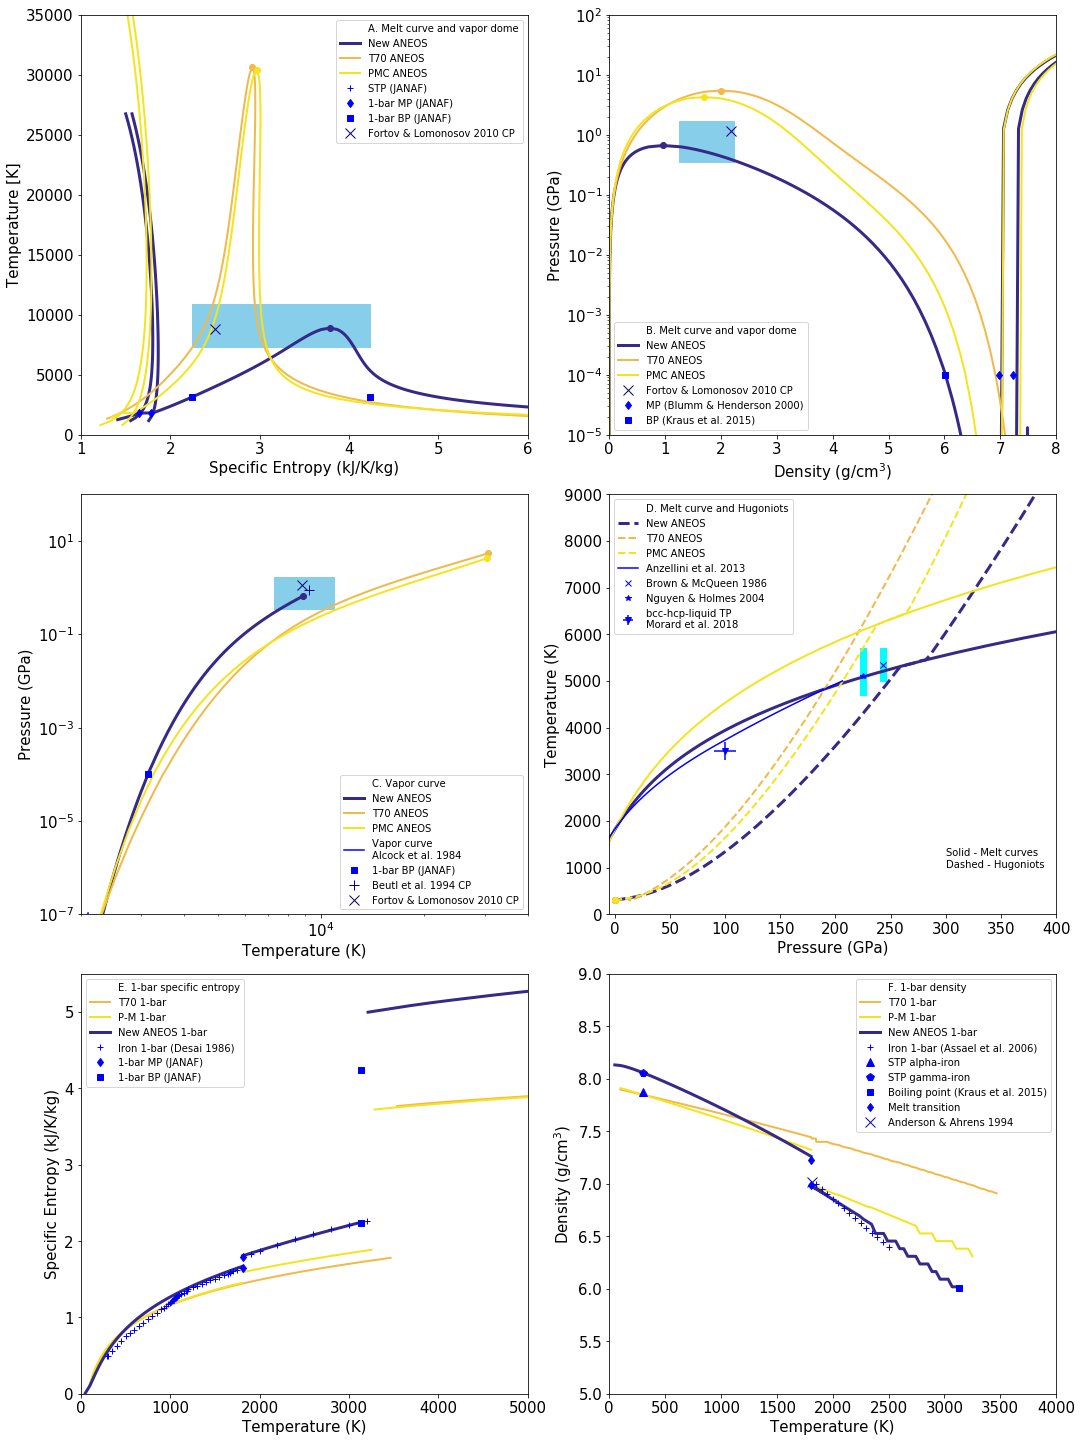

In [26]:
# PHASE DIAGRAM PLOTS
labid3 = ['New ANEOS','Z fit','Gas gun data','Ivanov ANEOS','T70 ANEOS','PMC ANEOS','Tillotson']

#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
plt.subplots_adjust(wspace=0.5)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot([], [], ' ', label="A. Melt curve and vapor dome")


#col=local_cmaps.parula(colid[4])
#axes[ai,aj].plot(GadgetEOS.hug.P,GadgetEOS.hug.S*1.e3,linid[4],color=col,markersize=msize,label=labid[4],linewidth=thiid[4])
#col=local_cmaps.parula(colid[5])
#axes[ai,aj].plot(CanupEOS.hug.P,CanupEOS.hug.S*1.e3,linid[5],color=col,markersize=msize,label=labid[5],linewidth=thiid[5])

#for ii in [3,0,1,2]:
for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].plot(TmpEOS.vc.Sl*1.E3,TmpEOS.vc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.Sv*1.E3,TmpEOS.vc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.S*1.E3,TmpEOS.cp.T,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Sl*1.E3,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.Ss*1.E3,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_ylim(0,35000)
axes[ai,aj].set_xlim(1,6)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].semilogy([], [], ' ', label="B. Melt curve and vapor dome")


for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].semilogy(TmpEOS.vc.rl,TmpEOS.vc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.rv,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.rho,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.rl,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.rs,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_ylim(1.e-5,100)
axes[ai,aj].set_xlim(0,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)



#------
# temperature - pressure vapor curve
ai=1
aj=0
axes[ai,aj].loglog([], [], ' ', label="C. Vapor curve")


for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].loglog(TmpEOS.vc.T,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.cp.T,TmpEOS.cp.P,'o',color=col)
    #if TmpEOS.tp.T > 0:
    #    axes[ai,aj].plot(TmpEOS.mc.T,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(2000,40000)
axes[ai,aj].set_ylim(1.e-7,100)



#-----------
# pressure - temperature melt curve
ai=1
aj=1
axes[ai,aj].plot([], [], ' ', label="D. Melt curve and Hugoniots")


for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Pl,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.P,TmpEOS.hug.T,'--',color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.hug.P[0],TmpEOS.hug.T[0],'o',color=col)

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,400)

axes[ai,aj].annotate('Solid - Melt curves\nDashed - Hugoniots',(300,1000))




#-------

#-------
#-----
# Temperature - Sp. Entropy at 1 bar 

ai=2
aj=0

axes[ai,aj].plot([], [], ' ', label="E. 1-bar specific entropy")


#Ivanov
#col=local_cmaps.parula(colid[3])
#tmp = np.where((IvanovEOS.onebar.S <= IvanovEOS.onebar.Sim)&(IvanovEOS.onebar.S > 0.))[0]
#axes[ai,aj].plot(IvanovEOS.onebar.T[tmp],IvanovEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[3]+2)
#tmp = np.where((IvanovEOS.onebar.S >= IvanovEOS.onebar.Scm)&(IvanovEOS.onebar.S <= IvanovEOS.onebar.Siv))[0]
#axes[ai,aj].plot(IvanovEOS.onebar.T[tmp],IvanovEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[3]+2)
#tmp = np.where((IvanovEOS.onebar.S >= IvanovEOS.onebar.Scv))[0]
#axes[ai,aj].plot(IvanovEOS.onebar.T[tmp],IvanovEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,label=labid2[3],linewidth=thiid[3]+2)

#gadget
col=local_cmaps.parula(colid[4])
tmp = np.where((GadgetEOS.onebar.S <= GadgetEOS.onebar.Sim)&(GadgetEOS.onebar.S > 0.))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[4])
tmp = np.where((GadgetEOS.onebar.S >= GadgetEOS.onebar.Scm)&(GadgetEOS.onebar.S <= GadgetEOS.onebar.Siv))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[4])
tmp = np.where((GadgetEOS.onebar.S >= GadgetEOS.onebar.Scv))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,label=labid2[4],linewidth=thiid[4])

#canup
col=local_cmaps.parula(colid[5])
tmp = np.where((CanupEOS.onebar.S <= CanupEOS.onebar.Sim)&(CanupEOS.onebar.S > 0.))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[5])
tmp = np.where((CanupEOS.onebar.S >= CanupEOS.onebar.Scm)&(CanupEOS.onebar.S <= CanupEOS.onebar.Siv))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,linewidth=thiid[5])
tmp = np.where((CanupEOS.onebar.S >= CanupEOS.onebar.Scv))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=msize,label=labid2[5],linewidth=thiid[5])


# Plot New ANEOS model
#axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.e3,'+',color='blue',label="ANEOS 1 bar")
labind = 0
col=local_cmaps.parula(colid[labind])
tmp = np.where((NewEOS.onebar.S <= NewEOS.onebar.Sim)&(NewEOS.onebar.S > 0.))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=style1[2],linewidth=thiid[0],label=labid2[0])
tmp = np.where((NewEOS.onebar.S >= NewEOS.onebar.Scm)&(NewEOS.onebar.S <= NewEOS.onebar.Siv))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=style1[2],linewidth=thiid[0])
tmp = np.where((NewEOS.onebar.S >= NewEOS.onebar.Scv))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.S[tmp]*1.e3,'-',color=col,markersize=style1[2],linewidth=thiid[0])

axes[ai,aj].plot(Desai_tarr,Desai_sarr,'+',color='blue',label='Iron 1-bar (Desai 1986)')


axes[ai,aj].plot(1809.,99.823/NewEOS.FMW,'d',color='blue',label='1-bar MP (JANAF)')
axes[ai,aj].plot(1809.,92.190/NewEOS.FMW,'d',color='blue')
# Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
axes[ai,aj].plot(3133.,2.24,'s',color='blue',label='1-bar BP (JANAF)')
axes[ai,aj].plot(3133.,4.238,'s',color='blue')
# STP NIST-JANAF
#axes[ai,aj].plot(273.,ironSTP_S*1.E3,'+',color='blue',label='STP (JANAF)',markersize=8)



axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,5.5)
axes[ai,aj].set_xlim(0,5000)
axes[ai,aj].legend(fontsize=sfont-5)


#--------------
# density-temperature at 1 bar
ai=2
aj=1

axes[ai,aj].plot([], [], ' ', label="F. 1-bar density")


#gadget
col=local_cmaps.parula(colid[4])
tmp = np.where((GadgetEOS.onebar.S <= GadgetEOS.onebar.Sim)&(GadgetEOS.onebar.S > 0.))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.rho[tmp],'-',color=col,markersize=msize,linewidth=thiid[4])
tmp = np.where((GadgetEOS.onebar.S >= GadgetEOS.onebar.Scm)&(GadgetEOS.onebar.S <= GadgetEOS.onebar.Siv))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.rho[tmp],'-',color=col,markersize=msize,linewidth=thiid[4])
tmp = np.where((GadgetEOS.onebar.S >= GadgetEOS.onebar.Scv))[0]
axes[ai,aj].plot(GadgetEOS.onebar.T[tmp],GadgetEOS.onebar.rho[tmp],'-',color=col,markersize=msize,label=labid2[4],linewidth=thiid[4])

#canup
col=local_cmaps.parula(colid[5])
tmp = np.where((CanupEOS.onebar.S <= CanupEOS.onebar.Sim)&(CanupEOS.onebar.S > 0.))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.rho[tmp],'-',color=col,markersize=msize,linewidth=thiid[5])
tmp = np.where((CanupEOS.onebar.S >= CanupEOS.onebar.Scm)&(CanupEOS.onebar.S <= CanupEOS.onebar.Siv))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.rho[tmp],'-',color=col,markersize=msize,linewidth=thiid[5])
tmp = np.where((CanupEOS.onebar.S >= CanupEOS.onebar.Scv))[0]
axes[ai,aj].plot(CanupEOS.onebar.T[tmp],CanupEOS.onebar.rho[tmp],'-',color=col,markersize=msize,label=labid2[5],linewidth=thiid[5])

# NEW ANEOS
labind = 0
col=local_cmaps.parula(colid[labind])
tmp = np.where((NewEOS.onebar.S <= NewEOS.onebar.Sim)&(NewEOS.onebar.S > 0.))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.rho[tmp],'-',color=col,markersize=style1[2],linewidth=thiid[0],label=labid2[0])
tmp = np.where((NewEOS.onebar.S >= NewEOS.onebar.Scm)&(NewEOS.onebar.S <= NewEOS.onebar.Siv))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.rho[tmp],'-',color=col,markersize=style1[2],linewidth=thiid[0])
tmp = np.where((NewEOS.onebar.S >= NewEOS.onebar.Scv))
axes[ai,aj].plot(NewEOS.onebar.T[tmp],NewEOS.onebar.rho[tmp],'-',color=col,markersize=style1[2],linewidth=thiid[0])



axes[ai,aj].plot(Assael_tarr,Assael_rarr/1.e3,'+',color='blue',label='Iron 1-bar (Assael et al. 2006)')
axes[ai,aj].plot(298.,7.873,'^',color='blue',label='STP alpha-iron',markersize=8)
axes[ai,aj].plot(298.,8.06,'p',color='blue',label='STP gamma-iron',markersize=8)

axes[ai,aj].plot([3133],[6.01],'s',color='blue',label='Boiling point (Kraus et al. 2015)')
# 3.4% volume change (Askeland 1996) with highest density from Assael et al. 2006
axes[ai,aj].plot([1809.,1809],[6.99,6.99*(1.034)],'d',color='blue',label='Melt transition')

axes[ai,aj].plot([1811.],[7.019],'x',color='blue',label='Anderson & Ahrens 1994',markersize=10)


axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(5,9)
axes[ai,aj].set_xlim(0,4000)



#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,7300.),2.,3600,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
   
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,298,'+',color='blue',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1809,'d',color='blue',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1809,'d',color='blue')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,3133,'s',color='blue',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,3133,'s',color='blue')

    axes[0,0].plot(2.496,8787,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)
    #EOS parameters of the critical point for iron Pc = 1.131 GPa, Tc = 8,787 K, Vc = 0.458cm3/g, Sc = 2.496 J/g/K


    # density-pressure [0,1]
    ai=0
    aj=1
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((1.24,.356),1.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    axes[ai,aj].plot(2.1834,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)


    # 99.99% Fe melting volume at 1 bar from Blumm & Henderson 2000 3.46%, approx 7.175 g/cm3 for solid at melt pt
    axes[ai,aj].plot([6.98,6.98*(1.0346)],[1.E-4,1.E-4],'d',color='blue',label='MP (Blumm & Henderson 2000)')

    # 1-bar Fe liquid at boiling point calculation Kraus et al. 2015
    axes[ai,aj].plot([6.01],[1.E-4],'s',color='blue',label='BP (Kraus et al. 2015)')


    # temperature -- pressure [1,0] vapor curve
    ai=1
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((7300.,.356),3600,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    # plot Fe experimentally fitted vapor curve from Alcock et al. 1984
    alcocktarr = np.arange(2100)+1
    # Fe solid good from 298 to melting point
    A=7.1
    B=-21723.
    C=0.4536
    D=-0.5846
    alcockfesolidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    # Fe liquid good from melting point to 2100 K
    A=6.347
    B=-19574
    C=0.
    D=0.
    alcockfeliquidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    axes[ai,aj].plot(alcocktarr[298:1809],alcockfesolidparr[298:1809],color='blue',label='Vapor curve\nAlcock et al. 1984')
    axes[ai,aj].plot(alcocktarr[1809:2100],alcockfeliquidparr[1809:2100],color='blue')
    axes[ai,aj].plot([3133.345],[1.e-4],'s',color='blue',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(9250.,8750.e-4,'+',color='navy',label='Beutl et al. 1994 CP',markersize=10)
    axes[ai,aj].plot(8787,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)




    # pressure- temperature [2,1]
    ai=1
    aj=1
    
    # Anzellini et al. 2013 Science iron melt curve high pressure region up to 200 GPa/5000 K
    anzmct3arr = (np.arange(100)+1.)/100.*1300.+3700 # K
    anzmcp3arr = (np.power(anzmct3arr/3712.,1.72)-1.)*161.2 + 98.5 # GPa
    anzmct2arr = (np.arange(100)+1.)/100.*3700. # K
    anzmcp2arr = (np.power(anzmct2arr/1991.,2.38)-1.)*27.39 + 5.2 # GPa
    axes[ai,aj].plot(anzmcp3arr,anzmct3arr,color="blue",linestyle='-',label='Anzellini et al. 2013')
    axes[ai,aj].plot(anzmcp2arr,anzmct2arr,color="blue",linestyle='-')

    rect = Rectangle((240.,5000.),6.,700,linewidth=1,edgecolor='cyan',facecolor='cyan')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(243.,5350,'x',color='blue',label='Brown & McQueen 1986')
    rect = Rectangle((222.,4700),6.,1000,linewidth=1,edgecolor='cyan',facecolor='cyan')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(225.,5100,'*',color='blue',label='Nguyen & Holmes 2004')

    axes[ai,aj].errorbar(100.,3500.,xerr=10.,yerr=200,fmt='v',color='blue',label='bcc-hcp-liquid TP\nMorard et al. 2018')


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)



plt.tight_layout(pad=0.6)
plt.savefig('ANEOS-iron-phase-boundaries.pdf', format='pdf', dpi=1000,transparent=True)
#--------


## Additional comparison of phase boundaries between different iron ANEOS models

Phase boundaries shown with solid lines. Hugoniots shown with dashed lines.

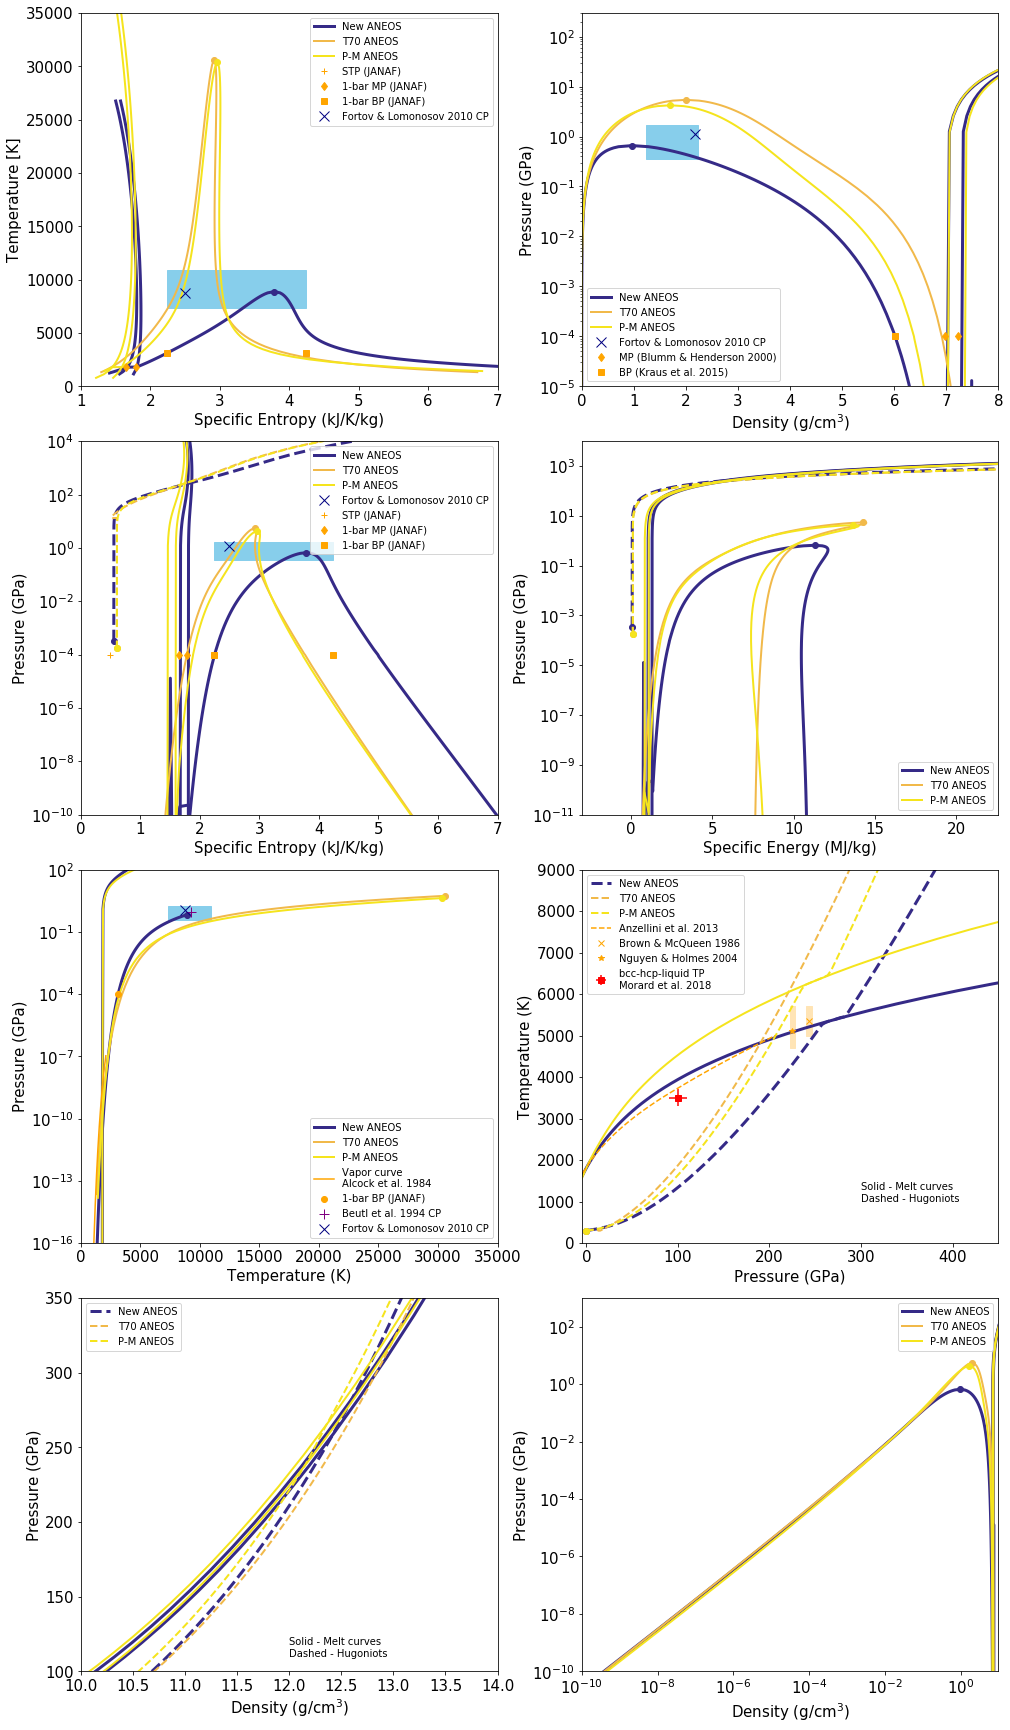

In [27]:
# OLD DIAGRAM KEEP
# PHASE DIAGRAM PLOTS
labid3 = ['New ANEOS','Z fit','Gas gun data','Ivanov ANEOS','T70 ANEOS','P-M ANEOS','Tillotson']

#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.5)

#------------------------------
# entropy-temperature
ai=0
aj=0

#col=local_cmaps.parula(colid[4])
#axes[ai,aj].plot(GadgetEOS.hug.P,GadgetEOS.hug.S*1.e3,linid[4],color=col,markersize=msize,label=labid[4],linewidth=thiid[4])
#col=local_cmaps.parula(colid[5])
#axes[ai,aj].plot(CanupEOS.hug.P,CanupEOS.hug.S*1.e3,linid[5],color=col,markersize=msize,label=labid[5],linewidth=thiid[5])

#for ii in [3,0,1,2]:
for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].plot(TmpEOS.vc.Sl*1.E3,TmpEOS.vc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.Sv*1.E3,TmpEOS.vc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.S*1.E3,TmpEOS.cp.T,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Sl*1.E3,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.Ss*1.E3,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_ylim(0,35000)
axes[ai,aj].set_xlim(1,7)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].semilogy(TmpEOS.vc.rl,TmpEOS.vc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.rv,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.rho,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.rl,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.rs,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(0,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].semilogy(TmpEOS.vc.Sl*1.E3,TmpEOS.vc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.Sv*1.E3,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.S*1.E3,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Sl*1.E3,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.Ss*1.E3,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.S*1.E3,TmpEOS.hug.P,'--',color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.S[0]*1.E3,TmpEOS.hug.P[0],'o',color=col)

    axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-10,10000)
axes[ai,aj].set_xlim(0,7)

#-----------
# specific energy - pressure
ai=1
aj=1

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].semilogy(TmpEOS.vc.Ul,TmpEOS.vc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.Uv,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.U,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Ul,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.Us,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.U,TmpEOS.hug.P,'--',color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.U[0],TmpEOS.hug.P[0],'o',color=col)

    axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-11,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*2.)

#-------
# temperature - pressure
ai=2
aj=0

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].semilogy(TmpEOS.vc.T,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.cp.T,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.T,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,35000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.Pl,TmpEOS.mc.T,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.P,TmpEOS.hug.T,'--',color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.hug.P[0],TmpEOS.hug.T[0],'o',color=col)

axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,9000)
axes[ai,aj].set_xlim(-5,450)

axes[ai,aj].annotate('Solid - Melt curves\nDashed - Hugoniots',(300,1000))

#-------
# density - pressure melt curve
ai=3
aj=0

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.rl,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.rs,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.hug.rho,TmpEOS.hug.P,'--',color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.hug.rho[0],TmpEOS.hug.P[0],'o',color=col)

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(100,350)
axes[ai,aj].set_xlim(10,14)

axes[ai,aj].annotate('Solid - Melt curves\nDashed - Hugoniots',(12,110))

#-------------------------
# density-pressure
ai=3
aj=1

for ii in [3,1,2]:
    if ii == 0:
        labind = 3
        TmpEOS = deepcopy(IvanovEOS)
    if ii == 1:
        labind = 4
        TmpEOS = deepcopy(GadgetEOS)
    if ii == 2:
        labind = 5
        TmpEOS = deepcopy(CanupEOS)
    if ii == 3:
        labind = 0
        TmpEOS = deepcopy(NewEOS)
                
    col=local_cmaps.parula(colid[labind])
    axes[ai,aj].loglog(TmpEOS.vc.rl,TmpEOS.vc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind],label=labid3[labind])
    axes[ai,aj].plot(TmpEOS.vc.rv,TmpEOS.vc.Pv,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
    axes[ai,aj].plot(TmpEOS.cp.rho,TmpEOS.cp.P,'o',color=col)
    if TmpEOS.tp.T > 0:
        axes[ai,aj].plot(TmpEOS.mc.rl,TmpEOS.mc.Pl,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])
        axes[ai,aj].plot(TmpEOS.mc.rs,TmpEOS.mc.Ps,linid[labind],color=col,markersize=msize,linewidth=thiid[labind])

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(1.e-10,10)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,7300.),2.,3600,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
   
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,298,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1809,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1809,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,3133,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,3133,'s',color='orange')

    axes[0,0].plot(2.496,8787,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)
    #EOS parameters of the critical point for iron Pc = 1.131 GPa, Tc = 8,787 K, Vc = 0.458cm3/g, Sc = 2.496 J/g/K


    # density-pressure [0,1]
    ai=0
    aj=1
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((1.24,.356),1.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    axes[ai,aj].plot(2.1834,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)


    # 99.99% Fe melting volume at 1 bar from Blumm & Henderson 2000 3.46%, approx 7.175 g/cm3 for solid at melt pt
    axes[ai,aj].plot([6.98,6.98*(1.0346)],[1.E-4,1.E-4],'d',color='orange',label='MP (Blumm & Henderson 2000)')

    # 1-bar Fe liquid at boiling point calculation Kraus et al. 2015
    axes[ai,aj].plot([6.01],[1.E-4],'s',color='orange',label='BP (Kraus et al. 2015)')

    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((2.24,.356),2.,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(2.496,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)
    # STP NIST-JANAF
    axes[ai,aj].plot(ironSTP_S*1.E3,1.E-4,'+',color='orange',label='STP (JANAF)')
    # 1 bar melting point JANAF delta-iron to liquid
    #1809.000		42.558		92.190		59.772		58.645		DELTA <--> LIQUID
    #1809.000		46.024		99.823		59.772		72.452		TRANSITION
    axes[ai,aj].plot(99.823/NewEOS.FMW,1.E-4,'d',color='orange',label='1-bar MP (JANAF)')
    axes[ai,aj].plot(92.190/NewEOS.FMW,1.E-4,'d',color='orange')
    # Boiling point NIST-JANAF, Kraus et al. Nature Geoscience 2015 and refs within
    axes[ai,aj].plot(2.24,1.E-4,'s',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(4.238,1.E-4,'s',color='orange')

    # temperature -- pressure [2,0]
    ai=2
    aj=0
    # range of ab initio predictions for the critical point from Medvedev 2014
    rect = Rectangle((7300.,.356),3600,1.35,linewidth=1,edgecolor='skyblue',facecolor='skyblue')
    axes[ai,aj].add_patch(rect)

    # plot Fe experimentally fitted vapor curve from Alcock et al. 1984
    alcocktarr = np.arange(2100)+1
    # Fe solid good from 298 to melting point
    A=7.1
    B=-21723.
    C=0.4536
    D=-0.5846
    alcockfesolidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    # Fe liquid good from melting point to 2100 K
    A=6.347
    B=-19574
    C=0.
    D=0.
    alcockfeliquidparr = 1.e-4*np.power(10.,A+B/alcocktarr+C*np.log10(alcocktarr)+D*alcocktarr*1.e-3) #GPa

    axes[ai,aj].plot(alcocktarr[298:1809],alcockfesolidparr[298:1809],color='orange',label='Vapor curve\nAlcock et al. 1984')
    axes[ai,aj].plot(alcocktarr[1809:2100],alcockfeliquidparr[1809:2100],color='orange')
    axes[ai,aj].plot([3133.345],[1.e-4],'o',color='orange',label='1-bar BP (JANAF)')
    axes[ai,aj].plot(9250.,8750.e-4,'+',color='purple',label='Beutl et al. 1994 CP',markersize=10)
    axes[ai,aj].plot(8787,1.131,'x',color='navy',label='Fortov & Lomonosov 2010 CP',markersize=10)




    # pressure- temperature [2,1]
    ai=2
    aj=1
    
    # Anzellini et al. 2013 Science iron melt curve high pressure region up to 200 GPa/5000 K
    anzmct3arr = (np.arange(100)+1.)/100.*1300.+3700 # K
    anzmcp3arr = (np.power(anzmct3arr/3712.,1.72)-1.)*161.2 + 98.5 # GPa
    anzmct2arr = (np.arange(100)+1.)/100.*3700. # K
    anzmcp2arr = (np.power(anzmct2arr/1991.,2.38)-1.)*27.39 + 5.2 # GPa
    axes[ai,aj].plot(anzmcp3arr,anzmct3arr,color="orange",linestyle='--',label='Anzellini et al. 2013')
    axes[ai,aj].plot(anzmcp2arr,anzmct2arr,color="orange",linestyle='--')

    rect = Rectangle((240.,5000.),6.,700,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(243.,5350,'x',color='orange',label='Brown & McQueen 1986')
    rect = Rectangle((222.,4700),6.,1000,linewidth=1,edgecolor='moccasin',facecolor='moccasin')
    axes[ai,aj].add_patch(rect)
    axes[ai,aj].plot(225.,5100,'*',color='orange',label='Nguyen & Holmes 2004')

    axes[ai,aj].errorbar(100.,3500.,xerr=10.,yerr=200,fmt='s',color='red',label='bcc-hcp-liquid TP\nMorard et al. 2018')


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5,loc='upper right')
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)
plt.savefig('iron-v0.2-compare-aneos-boundaries.pdf', format='pdf', dpi=1000,transparent=True)
#--------



## Check the grid spacing compared to the phase boundaries

Colors correspond to temperature. Black lines are ANEOS phase boundaries.

Note that ANEOS by default puts a tension region in for the solid that extends to rhomin (V17) in the input file. 

If the tension region is kept, it is visible as a kink connects to the low entropy extension of the melt curve in the lower left plot of density vs. specific entropy. 

The lack of points below 1000 K in the vapor dome (seen in temperature vs. specific entropy upper left) corresponds to when the sublimation pressure reaches 1.E-30. At this point, ANEOS bottoms out the pressures at this value and fixes the other state variables (it looks like to constant values; will investigate this region more closely later).

The ANEOS triple point convergence is not perfect, and there are kinks in the tabulated phase boundaries right at the triple point.

In [ ]:
# check the gridding of the table around the vapor curve

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.4)
tcolmin=0.
tcolmax=1.2*NewEOS.cp.T
tpltmax=1.2*NewEOS.cp.T

tskip=1
#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[ai,aj].set_ylim(0,tpltmax)
axes[ai,aj].set_xlim(0,25)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.Sl*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.T,color="black")


#-------------
ai=0
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-25,1000)
axes[ai,aj].set_xlim(1.e-20,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.E3,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.e3,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=1
aj=1


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,25)
axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)



#-------------
ai=2
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)
axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=2
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].loglog(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-10,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")


axes[ai,aj].set_ylim(0.,10)
axes[ai,aj].set_xlim(0.,15.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,20)
axes[ai,aj].set_xlim(1.E-15,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)




#-------------
ai=4
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,30)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=0

tcolmax=40000.
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,200)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#axes[0,0].legend(fontsize=sfont-5)
#axes[0,1].legend(fontsize=sfont-5)
#axes[1,0].legend(fontsize=sfont-5)
#axes[1,1].legend(fontsize=sfont-5)



# ANEOS KPA FLAG

                                TABLE          ANEOS
     KPAQQ=STATE INDICATOR      =1, 1p    =1, 1p    (eos without melt)
                                =2, 2p lv =2, 2p liquid/solid plus vapor
                                          =4, 1p solid  (eos with melt)
                                          =5, 2p melt   (eos with melt)
                                          =6, 1p liquid (eos with melt)
                                =-1 bad value of temperature
                                =-2 bad value of density
                                =-3 bad value of material number

To resolve a melt curve, there should be sufficient numbers of points within the melt curve (KPA=5, red points) so that the melt curve is continuously sampled in the grid.

The pink region is where the vapor pressure is bottomed out at 1.E-30 GPa or the pressures are negative (if there is a tension region.)

Every 5th isotherm is plotted.

In [ ]:
# check the ANEOS quality flag for errors in the EOS surface
uniqkarr = np.unique(NewEOS.KPA)
print("Unique values in the KPA flag array:", uniqkarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqkarr:
    ix = get_indexes(i,np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


    
# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)
kcolmin=1
kcolmax=7

tskip=5
#-------------


#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")


axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)


#-------------
ai=0
aj=1

for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-6,2000)
axes[ai,aj].set_xlim(0,13.)


#-------------
ai=1
aj=1
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)
    tmp = np.where(NewEOS.P[itt,:] < 0.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='purple')
    tmp = np.where(NewEOS.P[itt,:]*1.e30 <= 2.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='hotpink')

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")
    
axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
fig.show()

# Check the Melt Curve in Tabulated EOS

Colored lines correspond to isotherms. Black lines are ANEOS phase boundaries.

Tabulations of the equation of state can lead to erroneous material descriptions across the melt curve. In the following plots, the isotherms should be flat (constant pressure) across the phase boundary (black lines). Every 5th isotherm in the table is shown in the plotted regions.

Iron requires a very densly populated density grid to capture the melt curve, especially at high pressures.

In [ ]:
# CHECK MELT CURVE GRIDDING
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.5)
tcolmin=0.
tcolmax=1.5*NewEOS.cp.T
tpltmax=1.5*NewEOS.cp.T

tskip=5
# set tskip=1 and use grid 0 for example bad gridding of the melt curve
#-------------
ai=0
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(0,50)
axes[ai,aj].set_xlim(6.5,9.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=0
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(9.0,11.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")


axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(11.,13.,)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=1
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(4,7.5)

#-------------

ai=2
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(0.,50)
axes[ai,aj].set_xlim(1.5,2.)


#-------------

ai=2
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1.6,2.)


#-------------
ai=3
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_xlim(0.5,2.)
axes[ai,aj].set_ylim(0.,50)

#-------------
ai=3
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1,4.)



#-------------
ai=4
aj=0
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col,linestyle='-')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(300,550)
axes[ai,aj].set_xlim(13.5,15.)

axes[ai,aj].plot([],[],' ',label='Very high pressure melt curve.')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(800,1000)
axes[ai,aj].set_xlim(16.5,17.5)

axes[ai,aj].plot([],[],' ',label='Very high pressures')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)
axes[4,0].legend(fontsize=sfont-5)
axes[4,1].legend(fontsize=sfont-5)



## Example of bad gridding across the melt curve

The isotherms should be flat across the phase boundary, but the poor gridding leads to varying errors along the phase boundary. These errors would lead to energy errors and non-conservative behavior in the EOS model.

<img src="./bad-grid-example.png">

# PLOT GADGET2 FORMAT TABLE: Entropy-Density grid

## Color contour plots of the GADGET Rho-S table

The SESAME table and GADGET table use the same density array. So the GADGET table is linearly interpolated along a density-column to find the new table values at each point in the GADGET entropy grid. 

Errors in the interpolation, particularly near phase boundaries, can be seen in the sound speeds and KPA flags.


In [ ]:
if MAKEGADGETTABLE == 1:
    # PLOT COLOR SHADED VALUES RHO-S TABLE
    lw=1
    sfont = 15
    ds = (10,10)

    fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    ##================ Pressure
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.e3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.e3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider0 = make_axes_locatable(ax0)
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
    #cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
    cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
    #cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

    im1=ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(0.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)



    #================ Sp. Int. Energy
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    # does not want to label ticks in this location
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)


    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

    #================ Temperature
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['2', '4', '6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['2', '4','6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)

    plt.show()

    ##============= start new plot
    fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    #================ Sound Speed
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)


    ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)



    #================ HFE
    amin = np.min(GadEOS.A)
    amin = -1000.
    alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
    #print('amin, log10(amin)',amin,np.log10(-amin))
    #print('alogmax=',alogmax)
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
    cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    #================ KPA flag
    cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
        ax4.plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=KPA flag',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=KPA flag',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
    cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)

    plt.show()
else:
    print("No GADGET2 TABLE requested.")

# INTERPOLATION ISSUES
The IEP is calculated on the density-temperature grid using the following method: 
<ul>
    <li>Start with a grid that is twice as dense as the desired final grid and generate an ANEOS density-temperature table.
    <li>Split the table into two tables made from the even rows and columns and the odd rows and columns.
    <li>Interpolate for the odd index grid values using the even index table.
    <li>The IEP is given by (interpolated value-original value)/(original value) of the odd index table.
</ul>

These are the calculated IEP values for this gridded table release using bilinear interpolation. These values are saved in a standard 201-301 table format in file NEW-SESAME.IEPTXT<p>

<b>These IEP plots are for bilinear interpolation. The interpolation subdirectory also compares bilinear and rational function interpolation by Kerley (1977).</b>


## IEP for Pressure
<img src="./interpolation-parameter/IEP-P.png" width="800">

## IEP for Specific Internal Energy
<img src="./interpolation-parameter/IEP-U.png" width="800">

## IEP for Specific Entropy
<img src="./interpolation-parameter/IEP-S.png" width="800">

## IEP for sound speed
<img src="./interpolation-parameter/IEP-cs.png" width="800">

## IEP for the Helmholtz Free Energy
<img src="./interpolation-parameter/IEP-HFE.png" width="800">


# References

Adams, J. J., Agosta, D. S., Leisure, R. G., & Ledbetter, H. (2006). Elastic constants of monocrystal iron from 3 to 500 K. Journal of applied physics, 100(11), 113530.

Alcock, C. B., Itkin, V. P., & Horrigan, M. K. (1984). Vapour pressure equations for the metallic elements: 298–2500K. Canadian Metallurgical Quarterly, 23(3), 309-313.

Anderson, W. W., & Ahrens, T. J. (1994). An equation of state for liquid iron and implications for the Earth's core. Journal of Geophysical Research: Solid Earth, 99(B3), 4273-4284.

Anzellini, S., Dewaele, A., Mezouar, M., Loubeyre, P., & Morard, G. (2013). Melting of iron at Earth’s inner core boundary based on fast X-ray diffraction. Science, 340(6131), 464-466.

Askeland D R, 1996 Materialwissenschaften (Heidelberg: Spektrum Akademischer Verlag GmbH) p. 203

Assael, M. J., Kakosimos, K., Banish, R. M., Brillo, J., Egry, I., Brooks, R., ... & Wakeham, W. A. (2006). Reference data for the density and viscosity of liquid aluminum and liquid iron. Journal of Physical and Chemical Reference Data, 35(1), 285-300.

Beutl, M., Pottlacher, G., & Jäger, H. (1994). Thermophysical properties of liquid iron. International journal of thermophysics, 15(6), 1323-1331.

Blumm, J., & Henderson, J. B. (2000). Measurement of the volumetric expansion and bulk density of metals in the solid and molten regions. High Temperatures High Pressures, 32(1), 109-114.

Birch, F. (1964). Density and composition of mantle and core. Journal of geophysical research, 69(20), 4377-4388.

Brown, J. M., & McQueen, R. G. (1986). Phase transitions, Grüneisen parameter, and elasticity for shocked iron between 77 GPa and 400 GPa. Journal of Geophysical Research: Solid Earth, 91(B7), 7485-7494.

Burakovsky, L., & Preston, D. L. (2004). Analytic model of the Grüneisen parameter all densities. Journal of Physics and Chemistry of Solids, 65(8-9), 1581-1587.

Bushman, A.V., I. V. Lomonosov and K. V. Khishchenko, et al. (accessed 2019) Shock Wave Database, http://www.ihed.ras.ru/rusbank/

Chase Jr, M. W., Curnutt, J. L., Downey Jr, J. R., McDonald, R. A., Syverud, A. N., & Valenzuela, E. A. (1982). JANAF thermochemical tables, 1982 supplement. Journal of Physical and Chemical Reference Data, 11(3), 695-940.  https://janaf.nist.gov

Desai, P. D. (1986). Thermodynamic properties of iron and silicon. Journal of physical and chemical reference data, 15(3), 967-983.

Dewaele, A., Loubeyre, P., Occelli, F., Mezouar, M., Dorogokupets, P. I., & Torrent, M. (2006). Quasihydrostatic equation of state of iron above 2 Mbar. Physical Review Letters, 97(21), 215504.
Chicago	

Dorogokupets, P. I., Dymshits, A. M., Litasov, K. D., & Sokolova, T. S. (2017). Thermodynamics and Equations of State of Iron to 350 GPa and 6000 K. Scientific reports, 7, 41863.

Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.

Durek, J. J., and G. Ekstrom (1996) Modified PREM (Preliminary Reference Earth Model), doi:10.17611/DP/9785674, http://ds.iris.edu/spud/earthmodel/9785674.

Fischer, R. A. (2016). Melting of Fe alloys and the thermal structure of the core. Deep Earth: Physics and chemistry of the lower mantle and core, 217, 3-12.

Fischer, R. A., Campbell, A. J., Caracas, R., Reaman, D. M., Dera, P., & Prakapenka, V. B. (2012). Equation of state and phase diagram of Fe–16Si alloy as a candidate component of Earth's core. Earth and Planetary Science Letters, 357, 268-276.

Fortov, V. E., & Lomonosov, I. V. (2010). Shock waves and equations of state of matter. Shock waves, 20(1), 53-71.

Guinan, M. W., & Beshers, D. N. (1968). Pressure derivatives of the elastic constants of α-iron to 10 kbs. Journal of Physics and Chemistry of Solids, 29(3), 541-549.

Kerley, G. I. (1977). Rational function method of interpolation (No. LA-6903-MS). Los Alamos National Laboratory, Los Alamos, NM (United States).

Kerley, G. I. (1993). Multiphase equation of state for iron (No. SAND-93-0027). Sandia National Labs., Albuquerque, NM (United States).

Kraus, R. G., Root, S., Lemke, R. W., Stewart, S. T., Jacobsen, S. B., & Mattsson, T. R. (2015). Impact vaporization of planetesimal cores in the late stages of planet formation. Nature Geoscience, 8(4), 269.

Lin, J. F., Campbell, A. J., Heinz, D. L., & Shen, G. (2003). Static compression of iron‐silicon alloys: Implications for silicon in the Earth's core. Journal of Geophysical Research: Solid Earth, 108(B1).

Lyon, S. P., & Johnson, J. D. (1992). SESAME: The LANL equation of state database. Los Alamos National Laboratories Report LAUR-92-3407, Los Alamos, NM.

Marsh SP. (1980). LASL shock Hugoniot data. Univ of California Press.

Medvedev, A. B. (2014). Wide-range multiphase equation of state for iron. Combustion, Explosion, and Shock Waves, 50(5), 582-598.

Miozzi, F., Matas, J., Guignot, N., Badro, J., Siebert, J., & Fiquet, G. (2020). A New Reference for the Thermal Equation of State of Iron. Minerals, 10(2), 100.

Morard, G., Boccato, S., Rosa, A. D., Anzellini, S., Miozzi, F., Henry, L., ... & Boulard, E. (2018). Solving controversies on the iron phase diagram under high pressure. Geophysical Research Letters, 45(20), 11-074.

Nasch, P. M., Manghnani, M. H., & Secco, R. A. (1994). Sound velocity measurements in liquid iron by ultrasonic interferometry. Journal of Geophysical Research: Solid Earth, 99(B3), 4285-4291.

Nguyen, J. H., & Holmes, N. C. (2004). Melting of iron at the physical conditions of the Earth's core. Nature, 427(6972), 339.

Tillotson, J. H. (1962). Metallic equations of state for hypervelocity impact (No. GA-3216). General Atomics Division, General Dynamics, San Diego, CA.

Tsujino, N., Nishihara, Y., Nakajima, Y., Takahashi, E., Funakoshi, K. I., & Higo, Y. (2013). Equation of state of γ-Fe: Reference density for planetary cores. Earth and Planetary Science Letters, 375, 244-253.

Sjostrom, T., & Crockett, S. (2018). Quantum molecular dynamics of warm dense iron and a five-phase equation of state. Physical Review E, 97(5), 053209.

Zarestky, J., & Stassis, C. (1987). Lattice dynamics of γ-Fe. Physical Review B, 35(9), 4500.

Zeman, M., Holec, M., & Váchal, P. (2019). HerEOS: A framework for consistent treatment of the Equation of State in ALE hydrodynamics. Computers & Mathematics with Applications, 78(2), 483-503.

## ANEOS references
Thompson, S. L., H. S. Lauson, H. J. Melosh, G. S. Collins, S. T. Stewart, M-ANEOS source code v1.0, https://github.com/isale-code/M-ANEOS

Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1972). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Stewart, S., et al. (accepted). The shock physics of giant impacts: Key requirements for the equations of state. In J. Lane, T. Germann, and M. Armstrong (Eds.), 21st Biennial APS Conference on Shock Compression of Condensed Matter (SCCM19). AIP Publishing. (https://arxiv.org/abs/1910.04687)

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/

# ANEOS Input Parameters
## IRON-ANEOS-SLVTv0.2

EOS -1: low temperature solid model<br>
THUG, RHUG: initial state for the Hugoniot calculated in ANEOS.OUTPUT<br>
<p>
V01 nelem = 1: 1 element <br>
V02 model type=4: solid-liquid-gas model with ionization<br>
V03 rho0=8.06 g/cm3: reference state is gamma-iron at STP (value from model by Dorogokupets et al. 2017).<br>
V04 T0=298 K: reference state is STP.<br>
V05 P0=1.e6 dynes/cm2: reference state STP.<br>
V06 B0=1.51E12 dynes/cm2: Model value for gamma-iron at STP is 151 GPa (Dorogokupets et al. 2017).<br>
V07 gamma0=1.9: Fitted gamma0 to fit liquid data. The same Gruneisen function is applied to the solid and liquid. Note that gamma0 for gamma-iron (fcc) is 2.28 from Tsujino et al. (2013). <br>
V08 Tdebye=-450.0 K: Negative means use full Debye model.  Zarestky and Stassis (1987) experimentally constrained the 0K Debye temperature for gamma-iron to be 324 K. This value of 450 K is greater than the true value to compensate for the $f_{cv}>1$ in the thermal model. The modified value provides a good match to the specific entropy at the 1-bar melting temperature (delta-iron at the melting point). Note that a range of other values for gamma-iron have been reported/used in the literature. <br>
<p>
V09 TG model=0: Dugdale and MacDonald theory preferred for metals (Thompson & Lauson 1972)<br>
V10 3*C24=1.5: Sets gamma_inf=0.5 in the high density limit, which better fits the available data in the liquid region than a limiting value of 2/3. Sjostrom & Crockett (2018) also used a gamma_inf=0.5 for liquid iron (see discussions in Burakovsky and Preston, 2004). <br>
V11 Esep=10.20E10 erg/g: Zero temperature separation energy. Fitted to match the 1-bar boiling point when using $f_{cv}=1.33$.<br>
V12 Tmelt=1809 K: Melting temperature at reference pressure. Note that iron melts from the delta-phase at 1 bar. (JANAF) <br>
V13 C53=0 erg/g: Critical point adjustment parameter. Not used.<br>
V14 C54=0. [dimless]: Critical point adjustment parameter. Not used.<br>
V15 H0=0: Thermal conduction parameter. Not used.<br>
V16 C41=0: Thermal conduction parameter. Not used.<br>
<p>
V17 rhomin=0 g/cm3: minimum density for the solid. Defines the tension region in the model. The default value is 0.8*rho0 when rhomin=0.<br>
V18=0.0 g/cm3: Solid-solid phase transition parameter. Density at onset of transition. Not used.<br>
V19=0.0 g/cm3: Solid-solid phase transition parameter. Density at end of transition. Not used.<br>
V20=0.0 dynes/cm2: Solid-solid phase transition parameter. Pctr, pressure at the center of the transition. Not used.<br>
V21=0.0  dynes/cm2: Solid-solid phase transition parameter. First derivative of Pctr with respect to scaled density. Not used.<br>
V22=0.0  dynes/cm2: Solid-solid phase transition parameter. Second derivative of Pctr with respect to scaled density. Not used.<br>
V23 Hfusion=2.47E9 erg/g: Latent heat of fusion at the reference pressure from lab measurements in Desai 1986.<br>
V24 rhol/rhos=0.962: Volume change on melting. Tweaked to match slope of the melt curve so that the STP Hugoniot crosses at the experimentally-constrained point. True value 0.967 based on Askeland 1996, Blumm & Henderson 2000. <br>
<p>
V25 upper=0.0: Upper limit to cold compression curve extension. Default=1. Setting to zero means use default value.<br>
V26 lower=0.: Lower limit to cold compression curve extension. Default=0.<br>
V27 alpha=0.3: Liquid model parameter ($0<\alpha<1$, default=0.3).<br>
V28 beta=0.1: Liquid model parameter ($0<\beta<1$, default=0.1). beta cannot be equal to gamma.<br>
V29 gamma=0.2: Liquid model parameter ($0<\gamma<1$, default=0.2). beta cannot be equal to gamma.<br>
V30 C60=0: Gruneisen model adjustment parameter. Default=0.<br>
V31 C61=-0.75: Gruneisen model adjustment parameter; values between -1 and 0 lower the gamma in expanded states. Default=0. This is the most negative value that could be used that succeeded in solving for a vapor curve. <br>
V32 C62=0.5: Critical point adjustment parameter. Default=0. ($0<C63<1$). Fitted to improve critical point. Thompson and Lauson recommend a value of 0.5.<br>
<p>
V33 Ionization model=0=Saha model.<br>
V34-V35=0: Reactive chemistry model not used.<br>
V36-V40=0: Melosh molecular clusters model not used.<br>
<p>
V41 Tdebye=0 K: Vibrational Debye temperature<br>
V42 Potential_flag=0: Flag for Mie potential (1) from Melosh 2007 or original ANEOS Morse potential (0).<br>
V43 a_exp=0: Power in Mie potential (1 to 2). Not used.<br>
V44 $f_{cv}=1.33$: Adjust heat capacity in high temperature limit. $C_v=3f_{cv}NkT$. Adjusted to match 1-bar heat capacity data (Desai 1986) and entropy on the shock Hugoniot (Kraus et al. 2015)<br>
V45 QCC1: 1.E-20. low density value to transition to ideal gas.<br>
V45 QCC6: 1.E5. high temperature psi value to transition to ideal gas.<br>
V46 to V48=0: Variables not used.<br>
<p>
Z=26: Atomic number for Fe.<br>
Atomic Fraction=1.<br>

# Development Notes

STSM, sts@ucdavis.edu

May 2019

Setting up iron EOS Jupyter notebook, gathering lab data sources. Initial exploration guided by Sjostrom & Crockett (2018) liquid isotherms from QMD calculations and experimental 1-bar isobar data. 

Kraus et al. 2015 SOM provides a Hugoniot for liquid iron at the 1 bar boiling point. SOM section 1.7: "The weighted average of the liquid density measurements by Ref. 21,22 at 3133±70 K is 6.01±0.15 g cm−3."

Various preliminary models of varying quality.

Added plots of the melt curve to illustrate problems with continuity across the phase boundary. Melt curve is OK in a tabulated EOS if the grid is sufficiently dense. Added plots for KPA. When KPA=5 is continuous along the melt boundary, the boundary can be resolved.

June 2019

Added interactive gridding for the EOS table and standard sesame format table.

July 2019

Aneos code updated to include thermal adjustment parameter for the Debye function (Stewart et al., SCCM19). This is necessary for iron because the heat capacity in the liquid is greater than 3nR.

October 2019

Prepared pre-release version using gamma-iron as the single solid phase. gamma-iron (fcc) is the phase at the melt boundary from about 5 to about 100 GPa. Above 100 GPa, the melt curve phase is epsilon-iron. (Other phases may be present at very high pressures.)

Gathering previously used ANEOS input parameters for iron for comparisons. Three other ANEOS versions available: original Thompson 1970 iron with 130 kbar phase transition; iron with melt curve prepared by Pierazzo and Melosh circa 2001; iron with phase transition prepared by Ivanov circa 2000.

Put back in plots to SC18.
Trying more steeply sloped melt curves.

November 2019
Froze version IRON-ANEOS-SLVTv0.2 to develop iron-alloy model and conduct exploratory giant impact simulations.

January 2020
Completed documentation of the model. Prepared pre-release version for github.


End of File

##### 